# Miscellaneous Figures

last modified: 26th February 2020 by Daniel Baur

This jupyter notebook is used to generate all kinds of useful plots.
git reset --soft origin/<branch>


0. **[Stuff](#0.-Stuff)**<br>
    0.1 [Imports](#0.1-Imports)<br>
    0.2 [General Stuff](#0.2-General-Stuff)<br>
    0.3 [General Definitions](#0.3-General-Definitions)<br>
    

1. **[Decay Chains](#Decay-Chains)**<br>


2. **[Radon Emanation Chamber Scheme](#Radon-Emanation-Chamber-Scheme)**<br>


3. **[DM Sensitivity Plot](#3.-DM-Sensitivity-Plot)**<br>


4. **[BM, DM and DE Pie Chart](#4.-BM,-DM-and-DE-Pie-Chart)**<br>


5. **[Data Acquisition and Storage Scheme](#5.-Data-Acquisition-and-Storage-Scheme)**<br>


6. **[MonXe Gas System](#MonXe-Gas-System)**<br>


7. **[DARWIN ER Background](#7.-DARWIN-ER-Background)**<br>


8. **[MonXe Setup Scheme](#MonXe-Setup-Scheme)**<br>


9. **[TPC Scheme](#TPC-Scheme)**<br>


10. **[Colored Rectangle](#Colored-Rectangle)**<br>


11. **[Labelled DARWIN TPC](#Labelled-DARWIN-TPC)**<br>


12. **[Exemplary Waveform](#Exemplary-Waveform)**<br>


13. **[Exemplary Spectrum](#Exemplary-Spectrum)**<br>


14. **[ER and NR Detector Signature](#ER-and-NR-Detector-Signature)**<br>


15. **[Secular Equilibrium](#Secular-Equilibrium)**<br>


16. **[PTFE Market Scheme](#PTFE-Market-Scheme)**<br>


17. **[DARWIN Timeline Arrow](#DARWIN-Timeline-Arrow)**<br>


# 0. Stuff

## 0.1 Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pprint
import os
import random
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
from fpdf import FPDF
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib import rc
import sys
pathstring_miscellaneous_figures = "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/monxe_software/miscfig/"
pathstring_monxeana = "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/monxe_software/monxeana/"
sys.path.append(pathstring_miscellaneous_figures)
sys.path.append(pathstring_monxeana) 
import monxeana
import Miscellaneous_Figures as miscfig


## 0.2 General Stuff

In [2]:
# These two lines are used to deploy LaTEX for the fonts within an output figure.
# note1: All the necessary packages for this should already be imported for your AG Schumann Linux machine by default.
# note2: If you installed jupyter notebook on an external machine install the following packages in advance: $ sudo apt-get install font-manager texlive-latex-extra texlive-math-extra dvipng texlive-fonts-recommended
# note3: Should jupyter notebook throw an "OSError: error reading PNG HEADER" error, try reducing the dpi-value of the image.
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [3]:
input_pathstring = "./input/"
output_pathstring = "./output/"

In [4]:
colorstring_darwin_blue = '#004A9B'
standard_figsize = (5.670, 3.189)

image_format_dict = {
    "16_9" : {
        "figsize" : standard_figsize,
        "axes" : (160, 90)
    },
    "talk" : {
        "figsize" : (standard_figsize[0], standard_figsize[1]*(75/90)),
        "axes" : (160, 75)
    },
    "kt" : {
        "figsize" : ((5.670/1217)*1217, (5.670/1217)*635),
        "axes" : (160, 635/1217*160)
    },
}

# Decay Chains

In [5]:

rc('font',**{'family':"sans-serif"})
fontsizeisotopes = 5 # font size of the isotopes within the sqares, default is 20
rn222_cos = '#00FFFF' # hex color string; green: #00FF00, cyan: #00FFFF, red: #FF0000
rn222_cos_wrt = '#02c0d1'
rn220_cos = '#FF0000' # hex color string; green: #00FF00, cyan: #00FFFF, red: #FF0000
greystring = '#cfcfcf'
flag_invisibleaxis = False # flag to set the axis invisible
flag_showtitle = False # flag to set the title invisible
flag_transparent = False
br_212po = 64.07
br_208ti = 35.93



## 222Radon Decay Chain

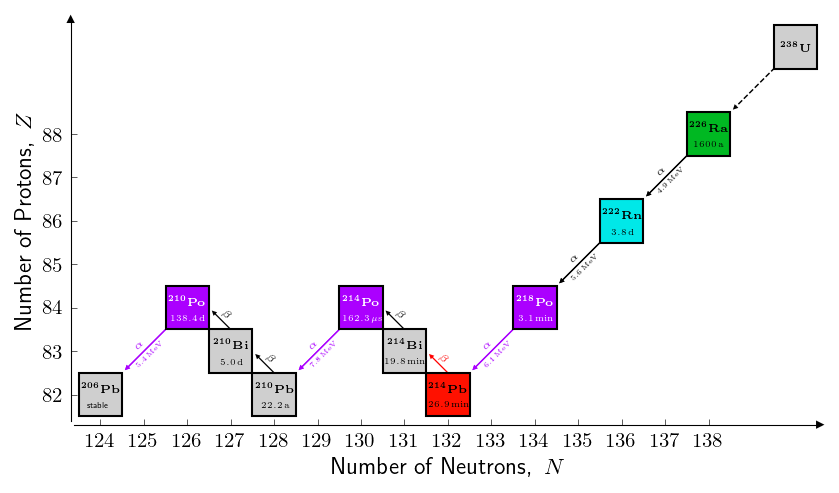

In [6]:
if [False,True][1]:


    ### plotting
    # plotting: setting up the canvas
    fig, ax1 =plt.subplots(figsize=(5.670, 3.189), dpi=150)
    # plotting: drawing the decayboxes
    miscfig.plot_decaybox(
        dictionary = {
            "namestring" : r"$\boldsymbol{^{238}\mathrm{U}}$",
            "n" : 140, # actually 146 for u238
            "z" : 90, # actually 92 for u238
            "decay" : "",
            "t_h" : ""},
        dbax = ax1,
        dbfs = fontsizeisotopes,
        dbboxcolor = greystring,
        dbnamestring_offset = (0.02,-0.15),
        dbhalflifestringstring_offset = (0.02,0.0),
        flag_plotarrow = False)

    miscfig.plot_arrow_connect_points(
        ax = ax1,
        points_list = [(140-0.5+0.03,90-0.5+0.03), (138+0.5+0.06,88+0.5+0.06)],
        linewidth = 0.7,
        linestyle = "--",
        color = "black",
        tip_width = 0.12,
        tip_length = 0.12,
        flag_single_connections = True,
        input_zorder = 3)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ra_226"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["ra226"]["color"], dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.02,0.0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_222"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["rn222"]["color"], dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.1,0.0), textcolor="black")
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_222"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.1,0.0), textcolor="black")
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_218"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po214"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.04,0.0), textcolor="white", arrowcolor=monxeana.isotope_dict["po214"]["color"], labelcolor=monxeana.isotope_dict["po214"]["color"])
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_218"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.04,0.0), textcolor="black", arrowcolor="black", labelcolor="black")
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["pb214"]["color"], dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(-0.1,0), arrowcolor='red', labelcolor='red')#'#7030a0')
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(-0.1,0), arrowcolor="black", labelcolor="black")#'#7030a0')
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.04,-0.0), dbhalflifestringstring_offset=(-0.1,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po214"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.07,0.0), textcolor="white", arrowcolor=monxeana.isotope_dict["po214"]["color"], labelcolor=monxeana.isotope_dict["po214"]["color"])
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.07,0.0), textcolor="black", arrowcolor="black", labelcolor="black")
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(0.05,0.0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.04,-0.0), dbhalflifestringstring_offset=(0.1,0.0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po214"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.02,0.0), textcolor="white", arrowcolor=monxeana.isotope_dict["po214"]["color"], labelcolor=monxeana.isotope_dict["po214"]["color"])
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.02,0.0), textcolor="black", arrowcolor="black", labelcolor="black")
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_206"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(0.04,0.0))


    ### axes:
    # axes: limits
    xlim = [124-0.5-0.1,140+0.5+0.1] # x/n axis range
    ylim = [82-0.5-0.1,90+0.5+0.1] # y/z axis range
    # axes: spine offset (the small gap between the n and the z axis)
    ax1.spines['bottom'].set_position(('axes', -0.01))
    ax1.spines['left'].set_position(('axes', -0.005))
    # axes: drawing arrows to the axes spines
    if flag_invisibleaxis == False:
        ax1.annotate('', xy=(-0.005,0.990), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
        ax1.annotate('', xy=(0.990,-0.01), xycoords='axes fraction', xytext=(5,0), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.tick_params(which='major', top=False, right=False)
    ax1.tick_params(which='minor', bottom=False, top=False, right=False, left=False)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    plt.xticks(range(124,139))
    plt.yticks(range(82,89))
    # axes: labels
    title_string = '$\\boldsymbol{^{222}\mathrm{Rn}}$ \\textbf{Decay Chain}'
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=-15)
    ax1.set_xlabel('Number of Neutrons, $\,N$')
    ax1.set_ylabel('Number of Protons, $\,Z$')
    # axes: removing axes bars and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    if flag_invisibleaxis == True:
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    ### saving
    plt.show()
    save_string = "rn222_decay_chain__step_4"
    abspath_output_folders = [
        #"/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/",
        #"/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
    ]
    for i in range(len(abspath_output_folders)):
        fig.savefig(abspath_output_folders[i] +save_string) #, transparent=True)


## 220Radon Decay Chain

In [7]:
if [False,True][0]:


    ### plotting
    # plotting: setting up the canvas
    fig, ax1 =plt.subplots(figsize=(5.670, 3.189), dpi=150) #21, 10.5
    # plotting: drawing the decayboxes
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ra_224"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.095,0.0), dbhalflifestringstring_offset=(0.11,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_220"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.12,0.0), dbhalflifestringstring_offset=(0.07,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_216"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.09,0.0), dbhalflifestringstring_offset=(-0.03,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.11,0.0), dbhalflifestringstring_offset=(0.06,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.058,0.0), dbhalflifestringstring_offset=(-0.13,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_betaarrow(ax=ax1, n=129-0.5, z=83-0.5, fs=fontsizeisotopes)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.085,0.0), dbhalflifestringstring_offset=(0,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ti_208"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.055,0.0), dbhalflifestringstring_offset=(-0.06,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_208"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.11,0.0), dbhalflifestringstring_offset=(0.04,0))

    ### axes:
    # axes: limits
    xlim = [124-0.5-0.1,138+0.5+0.1] # x/n axis range
    ylim = [81-0.5-0.1,88+0.5+0.1] # y/z axis range
    # axes: spine offset (the small gap between the n and the z axis)
    ax1.spines['bottom'].set_position(('axes', -0.01))
    ax1.spines['left'].set_position(('axes', -0.005))
    # axes: drawing arrows to the axes spines
    if flag_invisibleaxis == False:
        ax1.annotate('', xy=(-0.005,0.990), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
        ax1.annotate('', xy=(0.990, -0.01), xycoords='axes fraction', xytext=(5,0), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    # axes: modifying axes ticks
    # ticks on all spines
    ax1.tick_params(which='major', top=False, right=False)
    ax1.tick_params(which='minor', bottom=False, top=False, right=False, left=False)
    plt.xticks(range(124,139))
    plt.yticks(range(81,89))
    # axes: labels
    title_string = '$\\boldsymbol{^{220}\mathrm{Rn}}$ \\textbf{Decay Chain}'
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=-15)
    ax1.set_xlabel('Number of Neutrons, $\,N$')
    ax1.set_ylabel('Number of Protons, $\,Z$')
    # axes: removing axes bars and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    if flag_invisibleaxis == True:
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()

    ### saving
    plt.show()
    save_string = "1_220_radon_decay_chain"
    fig.savefig(output_pathstring +save_string +".png", transparent=flag_transparent)
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200519__group_meeting_talk__monxe/images/" +save_string +".png")


# Radon Emanation Chamber Scheme

## drawing nuclei, electrons and holes for the chamber scheme

In [8]:
if [False,True][0]:


    # adjustable input for all isotopes
    greystring = '#cfcfcf'
    circle_color_pn = ['#00fef2','#7800b4']
    circle_color_b = 'black'
    center = (80,45)
    flag_showaxis = False
    circle_radius = 13
    circle_linewidth = 2.6
    radmax = 400


    ###### grey alpha particle
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=circle_color_pn[0], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=circle_color_pn[1], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=circle_color_pn[0], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=circle_color_pn[1], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_alpha_particle_grey"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### colored alpha particle
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=monxeana.isotope_dict["po214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=monxeana.isotope_dict["po214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=monxeana.isotope_dict["po214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=monxeana.isotope_dict["po214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_alpha_particle_colored"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 214pb
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(214):
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=circle_color_pn[random.randrange(0,2,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=[monxeana.isotope_dict["po218"]["color"], monxeana.isotope_dict["po210"]["color"], monxeana.isotope_dict["po214"]["color"]][random.randrange(0,3,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=monxeana.isotope_dict["po214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_214pb"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 218po
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(218):
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_218po"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 222Rn
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(222):
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center, miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=circle_color_pn[random.randrange(0,2,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center, miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=monxeana.isotope_dict["rn222"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_222rn"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### electrons and holes
    # defining colors and names
    eh_list = [ # fill color, border color, savename
        [monxeana.color_monxe_cyan, monxeana.color_monxe_cyan, "eh_monxe_monxe.png"],
        ["white", "black", "eh_white_black.png"],
        ["black", "black", "eh_black_black.png"],
        ["white", greystring, "eh_white_grey.png"],
        [greystring, greystring, "eh_grey_grey.png"],
        ["white", monxeana.isotope_dict["po218"]["color"], "eh_white_po218.png"],
        ["white", monxeana.isotope_dict["po214"]["color"], "eh_white_po214.png"],
        ["white", monxeana.isotope_dict["po210"]["color"], "eh_white_po210.png"],
        [monxeana.isotope_dict["po218"]["color"], monxeana.isotope_dict["po218"]["color"], "eh_po218_po218.png"],
        [monxeana.isotope_dict["po214"]["color"], monxeana.isotope_dict["po214"]["color"], "eh_po214_po214.png"],
        [monxeana.isotope_dict["po210"]["color"], monxeana.isotope_dict["po210"]["color"], "eh_po210_po210.png"],
    ]
    for i in range(len(eh_list)):
        # setting up the canvas
        fig, ax1 =plt.subplots(figsize=standard_figsize)
        # drawing the nuclei
        miscfig.draw_nucleon(
            ax=ax1,
            r=center,
            circlecolor=eh_list[i][0],
            bordercolor=eh_list[i][1],
            lw=circle_linewidth,
            radius=circle_radius,
            izorder=24)
        # aspect of the axes
        ax1.set_aspect('equal')
        ax1.set_ylim([-10,100])
        ax1.set_xlim([0,160])
        # hiding axes and ticks
        if flag_showaxis == False:
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticks([])
            ax1.set_xticks([])
            ax1.set_axis_off()
        # saving
        plt.show()
        save_string = eh_list[i][2]
        fig.savefig(input_pathstring +save_string, transparent=True)


## Drawing the REC Scheme

In [9]:
if [False,True][0]:

    ### adjustable input
    save_string = "radon_emanation_chamber_scheme"
    flag_showaxis = False
    flag_showvessel = True
    flag_showvalves = True
    flag_showfield = True
    flag_showdiode = True
    flag_showhv = True
    flag_transparent = False

    
    
    flag_showradon = True
    flag_showsteps = True
    flag_showstep1 = False
    flag_showstep1sample = True
    flag_showstep2 = False
    flag_showstep3 = False
    flag_showstepname = True


    ### chamber design
    top_center = (80,80)
    radius = 70
    cylinder_height = 15
    chamber_linewidth = 1.6
    chamber_color = 'black'
    chamber_gas_dist = 0.8*radius # distance from top_center to the center of the gas pipes
    chamber_gas_diam = 3.0 # diamter of the gas pipes
    chamber_gas_height = 6.4 # height of the gas pipes
    chamber_valves_height = 0.58*chamber_gas_height # height at which the valves are mounted
    chamber_valve_lw = 1.8# linewidth of the valves
    chamber_valve_height = 3.5 # height of the valves
    chamber_valve_width = 5.9 # width of the valves
    # diode design
    d_height = 13 # height of the diode
    d_width = 50 # width of the diode
    d_ithickness = 9.6 # thickness of the intrinsic layer
    d_color = 'white' # color of the pn diode box
    d_icolor = 'white' # color of the i-layer box
    d_bcolor = 'black' # color of the block the diode sits on
    d_bheight = 1.0
    d_bwidth = 60
    # hv design
    hv_length = 0.5*radius # length from top_center to the right edge at which the hv line is drawn
    hv_size_left = 5 # size/height of the dc sign
    hv_size_right = 10 # size/height of the dc sign
    hv_distance = 2.1 # distance between the two bar of the hv sign
    hv_grounding_length = 10 # length/depth of the grounding line
    hv_grounding_width = 7 # width of the grounding symbol
    hv_grounding_distance = 1.8 # distance between the bars of the grounding symbol
    hv_linewidth = 0.85
    hv_linecolor = '#a9a9a9' #'black'
    # efield design
    ef_color = '#a9a9a9' #'red'
    ef_linewidth = 0.486
    ef_linedistance = 0.5*(0.5*d_width-0.13*0.5*d_width)
    # atoms/steps
    atom_step_color = colorstring_darwin_blue
    atom_zoom = 0.015
    atom_number_offset = (-8.4,-1.8)
    atom_number_offset_1 = (-8.4,+1.8)
    atom_pos_1 = miscfig.vs((+0.395*radius,-0.67*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_pos_2 = miscfig.vs((+0.245*radius,-0.32*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_pos_3 = miscfig.vs((+1.0*ef_linedistance,-0.028*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_labelsize = 11
    atom_pos_2_rel_alpha_pos = (+9.5,+9.0)
    atom_pos_3_rel_alpha_pos_1 = (-14.1,+6.0)
    atom_pos_3_rel_alpha_pos_2 = (-28.2,+12.0)
    atom_arrowms = 6.5
    atom_arrowcolor = colorstring_darwin_blue
    fs_stepname = 14
    color_stepname = colorstring_darwin_blue
    atom_number_pos_1 = miscfig.vs(atom_number_offset_1,atom_pos_1)
    atom_number_pos_2 = miscfig.vs(atom_number_offset,atom_pos_2)
    atom_number_pos_3 = miscfig.vs(atom_number_offset,atom_pos_3)
    rc('font',**{'family':"sans-serif"})
    step_offset = (-0.11*fs_stepname, -0.17*fs_stepname)
    step_offset_1 = (-0.22*fs_stepname, +0.17*fs_stepname)


    ### constructing the chamber by defining vertices
    # vessel
    a = miscfig.vs(top_center,(-radius,0)) # upper lefthand corner
    b = miscfig.vs(a,(0,-cylinder_height)) # below upper lefthand corner
    c = miscfig.vs(top_center,(0,-cylinder_height)) # center of the circle
    d = miscfig.vs(top_center,(radius,0)) # upper righthand corner
    e = miscfig.vs(d,(0,-cylinder_height)) # below upper righthand corner
    f = miscfig.vs(top_center,(0,-d_height))
    g1 = miscfig.vs(top_center, (chamber_gas_dist,0))
    g1l = miscfig.vs(g1, (-0.5*chamber_gas_diam,0))
    g1lh = miscfig.vs(g1l, (0,chamber_gas_height))
    g1r = miscfig.vs(g1, (+0.5*chamber_gas_diam,0))
    g1rh = miscfig.vs(g1r, (0,chamber_gas_height))
    g1v = miscfig.vs(g1, (0,chamber_valves_height))
    g2 = miscfig.vs(top_center, (-chamber_gas_dist,0))
    g2l = miscfig.vs(g2, (-0.5*chamber_gas_diam,0))
    g2lh = miscfig.vs(g2l, (0,chamber_gas_height))
    g2r = miscfig.vs(g2, (+0.5*chamber_gas_diam,0))
    g2rh = miscfig.vs(g2r, (0,chamber_gas_height))
    g2v = miscfig.vs(g2, (0,chamber_valves_height))
    # hv: upper lines
    hva = miscfig.vs(top_center,(0.5*d_width,-0.5*d_height))
    hvb = miscfig.vs(hva, ((hv_length/2)-(hv_distance/2),0))
    hvb_lower = miscfig.vs(hvb, (0, -(hv_size_left/2)))
    hvb_upper = miscfig.vs(hvb, (0, (hv_size_left/2)))
    hvc = miscfig.vs(hva, ((hv_length/2)+(hv_distance/2),0)) # hv line: right vertex of the sign
    hvc_lower = miscfig.vs(hvc, (0, -(hv_size_right/2)))
    hvc_upper = miscfig.vs(hvc, (0, (hv_size_right/2)))
    hvd = miscfig.vs(hva, (hv_length,0)) # hv line: upper right vertex of the line
    hve = miscfig.vs(hvd, (0,0.5*d_height)) # hv line: lower right vertex of the line
    # hv: grounding symbol
    hvf = miscfig.vs(hve, (0,-cylinder_height-miscfig.sphere_height(hv_length+0.5*d_width,radius))) # ground line: upper end
    hvg = miscfig.vs(hvf, (0,-hv_grounding_length))

    hvg1 = miscfig.vs(hvg, (-(hv_grounding_width/2),0))
    hvg2 = miscfig.vs(hvg, (+(hv_grounding_width/2),0))
    hvh = miscfig.vs(hvg, (0,-hv_grounding_distance))
    hvh1 = miscfig.vs(hvh, (-(3/5)*(hv_grounding_width/2),0))
    hvh2 = miscfig.vs(hvh, (+(3/5)*(hv_grounding_width/2),0))
    hvi = miscfig.vs(hvh, (0,-hv_grounding_distance))
    hvi1 = miscfig.vs(hvi, (-(1/5)*(hv_grounding_width/2),0))
    hvi2 = miscfig.vs(hvi, (+(1/5)*(hv_grounding_width/2),0))


    ### plotting the chamber
    # setting up the canvas
    fig =plt.figure(figsize=standard_figsize, dpi=150, constrained_layout=False)
    ax1 = fig.add_axes([0,0,1,1])
    # drawing the electrical field lines
    if flag_showfield == True:
        # draw curved field lines (from left to right)
        miscfig.draw_field_line(ax=ax1, rsp_x=-2*ef_linedistance, rep_x=-63, x1_length=6, x2_length=8, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=-ef_linedistance, rep_x=-37, x1_length=12, x2_length=18, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=+ef_linedistance, rep_x=+37, x1_length=12, x2_length=18, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=+2*ef_linedistance, rep_x=+63, x1_length=6, x2_length=8, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        # draw vertical center field line
        miscfig.plot_line(start_tuple=miscfig.vs(c,(0,-radius)), end_tuple=miscfig.vs(top_center,(0,-d_height)), linewidth=ef_linewidth, linecolor=ef_color)
        arrowhead = patches.Polygon(xy=[[f[0],f[1]], [f[0]+1.2,f[1]-1.8], [f[0]-1.2,f[1]-1.8]], closed=True, facecolor=ef_color, zorder=23)
        ax1.add_patch(arrowhead)
        # label the efield
        plt.text(f[0]-0.87*radius, f[1]-7.7, 'Electrical Drift Field', fontsize=11)
    # drawing the HV connection
    if flag_showhv == True:
        # hv connection
        miscfig.plot_line(start_tuple=hva, end_tuple=hvb, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvc, end_tuple=hvd, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvd, end_tuple=hve, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv dc sign
        miscfig.plot_line(start_tuple=hvb_lower, end_tuple=hvb_upper, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvc_lower, end_tuple=hvc_upper, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv grounding
        miscfig.plot_line(start_tuple=hvf, end_tuple=hvg, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvg1, end_tuple=hvg2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvh1, end_tuple=hvh2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvi1, end_tuple=hvi2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv string
        plt.text(hve[0]-0.4*hv_length, hve[1]-0.9*d_height, 'HV-', fontsize=11)
    # drawing the vessel
    if flag_showvessel == True:
        #plot_line(start_tuple=a, end_tuple=d, linewidth=chamber_linewidth, linecolor=chamber_color)
        # gas pipes
        miscfig.plot_line(start_tuple=g1l, end_tuple=g2r, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=a, end_tuple=g2l, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=d, end_tuple=g1r, linewidth=chamber_linewidth, linecolor=chamber_color)
        # valves
        if flag_showvalves == True:
            miscfig.plot_line(start_tuple=g1l, end_tuple=g1lh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g1r, end_tuple=g1rh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2l, end_tuple=g2lh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2r, end_tuple=g2rh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_valve(ax=ax1, r=g1v, lw=chamber_valve_lw, width=chamber_valve_width, height=chamber_valve_height, add_rot=0, zorder=25)
            miscfig.plot_valve(ax=ax1, r=g2v, lw=chamber_valve_lw, width=chamber_valve_width, height=chamber_valve_height, add_rot=0, zorder=25)
        else:
            miscfig.plot_line(start_tuple=g1l, end_tuple=g1r, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2l, end_tuple=g2r, linewidth=chamber_linewidth, linecolor=chamber_color)
        # orthogonal parts
        miscfig.plot_line(start_tuple=a, end_tuple=b, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=d, end_tuple=e, linewidth=chamber_linewidth, linecolor=chamber_color)
        # hemisphere
        miscfig.plot_circle(center=c, radius=radius, phicoverage=(1,2), linewidth=chamber_linewidth, linecolor=chamber_color, numberofpoints=1000, izorder=32)
        # label
        plt.text(top_center[0]-0.92*radius, top_center[1]-cylinder_height -0.91*radius, 'Sample Vessel', fontsize=11)
    # drawing the diode
    if flag_showdiode == True:
        # block
        #block = patches.Rectangle(xy=miscfig.vs(top_center,(-d_bwidth/2,-d_bheight)), width=d_bwidth, height=d_bheight, angle=0.0, linewidth=2, edgecolor='black', facecolor=d_bcolor, zorder=19)
        #ax1.add_patch(block)
        # p- and n-layer
        pnbox = patches.Rectangle(xy=miscfig.vs(top_center,(-d_width/2,-d_height)), width=d_width, height=d_height, angle=0.0, linewidth=0.7, edgecolor='black', facecolor=d_color, zorder=20, hatch='///////') # The keyword 'hatch' has to be in {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Inserting multiple characters (e.g. '///') yields a finer hatching. Multiple characters (e.g. '/.o') are possible as well.
        ax1.add_patch(pnbox)
        # i-layer
        ibox = patches.Rectangle(xy=miscfig.vs(top_center,(-d_width/2,-0.5*d_height-0.5*d_ithickness)), width=d_width, height=d_ithickness, angle=0.0, linewidth=0.7, edgecolor='black', facecolor=d_icolor, zorder=22)
        ax1.add_patch(ibox)
        #plt.text(top_center[0]-1.5*ef_linedistance, top_center[1]-0.5*d_height-1.2, 'i', fontsize=17, zorder=23)
        #plt.text(top_center[0]-1.5*ef_linedistance-0.3, top_center[1]-0.5*d_height -(0.5*d_ithickness+0.25*(d_height-d_ithickness)) -0.6, 'p', fontsize=17, zorder=23)
        #plt.text(top_center[0]-1.5*ef_linedistance-0.6, top_center[1]-0.5*d_height +(0.5*d_ithickness+0.25*(d_height-d_ithickness)) -1, 'n', fontsize=17, zorder=23)
        plt.text(top_center[0]-0.7*d_width, top_center[1]+2, 'PIN Diode', fontsize=11)
    # drawing the atoms/steps
    if flag_showsteps == True:
        ### 1: radon emanation
        atom_sample_pos = miscfig.vs(top_center, (-0.2*radius,-1.05*radius))
        if flag_showstep1 == True:
            miscfig.draw_number(ax=ax1, r=atom_number_pos_1, num="1", circlecolor=atom_step_color, num_offset=(+0.46,-0.3))
            miscfig.image_onto_plot(filestring='scheme_222rn.png', ax=ax1, position=atom_pos_1, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #plt.text(atom_pos_1[0]+4.0, atom_pos_1[1]+4.1, '$\\boldsymbol{^{222}\\mathrm{Rn}}$', fontsize=atom_labelsize, color=atom_step_color)
            if flag_showstep1sample == True:
                #miscfig.image_onto_plot(filestring='3001_crop.png', ax=ax1, position=atom_sample_pos, pathstring=input_pathstring, zoom=0.15, zorder=10)        
                miscfig.image_onto_plot(filestring='3001_crop_green.png', ax=ax1, position=atom_sample_pos, pathstring=input_pathstring, zoom=0.15, zorder=10)        
                plt.text(atom_sample_pos[0]+12.0, atom_sample_pos[1]+5.1, 'Sample', fontsize=atom_labelsize, color='black')
                #miscfig.rec_arrow(ax=ax1, start=atom_pos_1, direction=miscfig.vs(atom_pos_1,atom_sample_pos,sn=True), ms=atom_arrowms, length=18.5, col=atom_arrowcolor)
            if flag_showstepname == True:
                plt.text(atom_number_pos_1[0] +step_offset_1[0], atom_number_pos_1[1] +step_offset_1[1], r'$\boldsymbol{^{222}\mathrm{Rn}}$ Emanation', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top")
        ### 2: electron strip-off and ion drift
        if flag_showstep2 == True:
            miscfig.draw_number(ax=ax1, r=atom_number_pos_2, num="2", circlecolor=atom_step_color, num_offset=(0.1,-0.1))
            miscfig.image_onto_plot(filestring='scheme_218po.png', ax=ax1, position=atom_pos_2, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #plt.text(atom_pos_2[0]+4.1, atom_pos_2[1]-4.7, '$\\boldsymbol{^{218}\\mathrm{Po}^{+}}$', fontsize=atom_labelsize, color=atom_step_color)
            #plt.text(atom_pos_2[0]+12.8, atom_pos_2[1]+9.8, '$\\boldsymbol{\\alpha}$', fontsize=atom_labelsize, color=atom_step_color)
            #miscfig.image_onto_plot(filestring='scheme_alpha_particle_grey.png', ax=ax1, position=miscfig.vs(atom_pos_2_rel_alpha_pos,atom_pos_2), pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #miscfig.rec_arrow(ax=ax1, start=atom_pos_2, direction=atom_pos_2_rel_alpha_pos, length=-10, ms=atom_arrowms, col=atom_arrowcolor)
            #miscfig.rec_arrow(ax=ax1, start=miscfig.vs(atom_pos_2,atom_pos_2_rel_alpha_pos), direction=atom_pos_2_rel_alpha_pos, ms=atom_arrowms, col=atom_arrowcolor, length=15)
            miscfig.rec_arrow(ax=ax1, start=atom_pos_2, direction=miscfig.vs(atom_pos_2,[-top_center[0], -top_center[1]]), length=-10, ms=atom_arrowms, col=atom_arrowcolor)
            if flag_showstepname == True:
                plt.text(atom_number_pos_2[0] +step_offset[0], atom_number_pos_2[1] +step_offset[1], 'Ion Drift', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top")
        ### 3: signal formation
        if flag_showstep3 == True:
            arrow_3_length = 18.5
            #atom_pos_3_rel_alpha_pos
            miscfig.draw_number(ax=ax1, r=atom_number_pos_3, num="3", circlecolor=atom_step_color, num_offset=(0.04,-0.34))
            miscfig.image_onto_plot(filestring='scheme_214pb.png', ax=ax1, position=atom_pos_3, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            miscfig.image_onto_plot(filestring='scheme_alpha_particle_colored.png', ax=ax1, position=miscfig.vs(atom_pos_3_rel_alpha_pos_2,atom_pos_3), pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #plt.text(atom_pos_3[0]+5.8, atom_pos_3[1]+3.8, '$\\boldsymbol{^{214}\\mathrm{Pb}}$', fontsize=atom_labelsize, color=atom_step_color)
            plt.text(atom_pos_3[0]+atom_pos_3_rel_alpha_pos_2[0]+3.65, atom_pos_3[1]+atom_pos_3_rel_alpha_pos_2[1]+1.2, '$\\boldsymbol{\\alpha}$', fontsize=atom_labelsize, zorder=24, color=atom_step_color)
            #miscfig.rec_arrow(ax=ax1, start=miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos), direction=atom_pos_3_rel_alpha_pos, ms=atom_arrowms, length=arrow_3_length, col=atom_arrowcolor)
            # drawing electrons and holes into the PIN diode
            pos_list = miscfig.gen_position_list(
                track_start = miscfig.vs(atom_pos_3, atom_pos_3_rel_alpha_pos_1),
                track_end = miscfig.vs(atom_pos_3, atom_pos_3_rel_alpha_pos_2),
                y_dist_max = 0.2*d_height,
                num = 20)
#            pos_list = miscfig.gen_position_list(
#                num = 20,
#                arrow_start = miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos_1),
#                arrow_end = miscfig.vs(miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos_1),miscfig.scale_vector(vec=atom_pos_3_rel_alpha_pos_1, length=arrow_3_length)),
#                i_bottom = top_center[1] -0.5*d_height -0.5*d_ithickness,
#                i_top = top_center[1] -0.5*d_height +0.5*d_ithickness)
            for i in pos_list:
                miscfig.image_onto_plot(filestring="eh_black_black.png", ax=ax1, position=(i[0],i[1]), pathstring=input_pathstring, zoom=0.009, zorder=23)
                miscfig.image_onto_plot(filestring="eh_white_black.png", ax=ax1, position=(i[0],i[2]), pathstring=input_pathstring, zoom=0.009, zorder=23)
            if flag_showstepname == True:
                plt.text(atom_number_pos_3[0] +step_offset[0], atom_number_pos_3[1] +step_offset[1], 'Signal Formation', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top")



    ### aspect
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-6,88])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        
        
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    ### saving
    plt.show()
    if flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == False and flag_showstep3 == False:
        save_string = save_string +"_step1"
    elif flag_showsteps == True and flag_showstep1 == False and flag_showstep2 == True and flag_showstep3 == False:
        save_string = save_string +"_step2"
    elif flag_showsteps == True and flag_showstep1 == False and flag_showstep2 == False and flag_showstep3 == True:
        save_string = save_string +"_step3"
    elif flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == True and flag_showstep3 == False:
        save_string = save_string +"_step12"
    elif flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == True and flag_showstep3 == True:
        save_string = save_string +"_step123"
    fig.savefig(output_pathstring +save_string +".png", transparent=flag_transparent)
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/" +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/" +save_string +".png")



In [10]:
rc('font',**{'family':"serif"})


# 3. DM Sensitivity Plot

In [11]:
if [False,True][0]:


    ### adjustable input
    title_string = "WIMP Sensitivities of Dual-Phase LXe TPC Experiments"
    xaxis_string = "WIMP Mass, $\\,\\,m\\,\\big[\\mathrm{\\frac{GeV}{c^2}}\\big]$"
    yaxis_string = "SI WIMP-Nucleon Cross-Section, $\\,\\,\\sigma_{\\mathrm{SI}}\\,\\big[\\mathrm{cm^2}\\big]$"
    save_string = "3_dm_sensitivity_plot"
    rc('font',**{'family':"sans-serif"})
    image_format = "kt"
    # flags
    flag_showpastexperiments = False
    flag_showcurrentlimits = True
    flag_shownextgenexperiments = True
    flag_showdarwin = True
    flag_showneutrinofloor = True
    # axes
    x_range = [6,1000]
    y_range = [5*10**(-50),5*10**(-45)]
    # colors
    color_pastexperiments = 'black'
    color_currentlimits = '#008000'
    color_fillcurrentlimits = '#e8e8e8'
    color_xenonnt = '#32CD32'
    color_lz = '#20B2AA'
    color_pandax4t = '#32CD32'
    #color_darwin = colorstring_darwin_blue # dark blue as in the presentation
    #color_darwin_1sigma = '#00CED1' # dark cyan
    #color_darwin_2sigma = 'cyan'
    color_darwin = 'black'
    color_darwin_1sigma = colorstring_darwin_blue
    color_darwin_2sigma = 'cyan'
    color_neutrinofloor = 'orange'
    color_fillneutrinofloor = '#e8e8e8'
    # fonts
    fontsize_experiment_label = 8
    # linewidths
    linewidth_sensitivity_curves = 0.5
    linewidth_sensitivity_curves_next_gen = 1.2
    linewidth_excluded_area = 4.0
    linewidth_darwin = 1.0
    linewidth_darwin_sigma_borders = 0.6




    ### reading in the sensitivity data
    # past experiments
    dms_zeplin3_x, dms_zeplin3_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_zeplin3_data.csv")
    dms_pandax2017_x, dms_pandax2017_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_pandax2017_data.csv")
    dms_lux2017_x, dms_lux2017_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_lux2017_data.csv")
    dms_lux_x, dms_lux_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_lux_data.csv")
    dms_deap3600_x, dms_deap3600_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_deap3600_data.csv")
    # XENON1T: best current limit
    dms_xenon1t_x, dms_xenon1t_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_xenon1t_data.csv")
    # next-generation detectors
    dms_darkside20k_x, dms_darkside20k_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darkside20k.csv")
    dms_pandax4t_x, dms_pandax4t_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_pandax4t.csv")
    dms_xenonnt_x, dms_xenonnt_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_xenonnt.csv")
    dms_lz_x, dms_lz_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_lz.csv")
    # DARWIN
    dms_darwin200ty_x, dms_darwin200ty_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty.csv")
    dms_darwin200ty_x__2s_upper, dms_darwin200ty_y__2s_upper = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__2s_upper.csv")
    dms_darwin200ty_x__2s_lower, dms_darwin200ty_y__2s_lower = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__2s_lower.csv")
    dms_darwin200ty_x__1s_upper, dms_darwin200ty_y__1s_upper = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__1s_upper.csv")
    dms_darwin200ty_x__1s_lower, dms_darwin200ty_y__1s_lower = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__1s_lower.csv")
    # neutrino floor
    dms_neutrinofloor_x, dms_neutrinofloor_y = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_neutrino_floor.csv")



    ### plotting
    fig, ax1 =plt.subplots(figsize=image_format_dict[image_format]["figsize"], dpi=150, constrained_layout=True)
    # axes: aspect of the axes
    #ax1.set_aspect('equal')
    #ax1.set_ylim([0,image_format_dict[image_format]["axes"][1]])
    #ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])

    # neutrino floor
    if flag_showneutrinofloor == True:
        plt.plot(dms_neutrinofloor_x, dms_neutrinofloor_y, linewidth=1.5*linewidth_excluded_area, color='black', linestyle='-', zorder=0)
        plt.plot(dms_neutrinofloor_x, dms_neutrinofloor_y, linewidth=linewidth_excluded_area, color=color_neutrinofloor, linestyle='-', zorder=0)
        plt.text(7, 10**(-49), 'Neutrino Floor', fontsize=fontsize_experiment_label, color=color_neutrinofloor)
        ax1.fill_between(dms_neutrinofloor_x, dms_neutrinofloor_y, 0, interpolate=True, color=color_fillneutrinofloor)
    # past experiments
    if flag_showpastexperiments == True:
        # ZEPLIN-III
        plt.plot(dms_zeplin3_x, dms_zeplin3_y, linewidth=linewidth_sensitivity_curves, color=color_pastexperiments)
        plt.text(10, 10**(-45), 'ZEPLIN $\mathrm{III}$', fontsize=fontsize_experiment_label, color=color_pastexperiments)
        # PandaX
        plt.plot(dms_pandax2017_x, dms_pandax2017_y, linewidth=linewidth_sensitivity_curves, color=color_pastexperiments)
        plt.text(10, 10**(-45), 'PandaX', fontsize=fontsize_experiment_label, color=color_pastexperiments)
        # LUX
        plt.plot(dms_lux_x, dms_lux_y, linewidth=linewidth_sensitivity_curves, color=color_pastexperiments)
        plt.text(10, 10**(-45), 'LUX', fontsize=fontsize_experiment_label, color=color_pastexperiments)
        # DEAP-3600
        #plt.plot(dms_deap3600_x, dms_deap3600_y, linewidth=2.2, color=color_pastexperiments)
        #plt.text(10, 10**(-45), 'DEAP-3600', fontsize=22, color=color_pastexperiments)
    # current limits
    if flag_showcurrentlimits == True:
        plt.plot(dms_xenon1t_x, dms_xenon1t_y, linewidth=1.5*linewidth_excluded_area, color='black', linestyle='-', zorder=0)
        plt.plot(dms_xenon1t_x, dms_xenon1t_y, linewidth=linewidth_excluded_area, color=color_currentlimits)
        plt.text(120, 1.3*10**(-46), r'XENON1T $(1\,\mathrm{ty})$', fontsize=fontsize_experiment_label, color=color_currentlimits, rotation=11, zorder=21)
        fill_list = np.zeros_like(dms_xenon1t_y)
        ax1.fill_between(dms_xenon1t_x, dms_xenon1t_y, 1, interpolate=True, color=color_fillcurrentlimits, zorder=20)
    # next-generation experiments
    if flag_shownextgenexperiments == True:
        # DarkSide 20k
        #plt.plot(dms_darkside20k_x, dms_darkside20k_y, linewidth=2.2, color=color_nextgenerationexperiments)
        #plt.text(10, 10**(-45), 'DarkSide 20k', fontsize=22, color=color_nextgenerationexperiments)
        # PandaX-4t
        plt.plot(dms_pandax4t_x, dms_pandax4t_y, linewidth=linewidth_sensitivity_curves_next_gen, color=color_pandax4t, linestyle='-.')
        plt.text(250, 1.9*10**(-47), r'PandaX-4T $(5.6\,\mathrm{ty})$', fontsize=fontsize_experiment_label, color=color_pandax4t, rotation=11)
        # XENONnT
        plt.plot(dms_xenonnt_x, dms_xenonnt_y, linewidth=linewidth_sensitivity_curves_next_gen, color=color_xenonnt, linestyle=':')
        plt.text(140, 3.7*10**(-48), r'XENONnT $(20\,\mathrm{ty})$', fontsize=fontsize_experiment_label, color=color_xenonnt, rotation=11)
        # LZ
        plt.plot(dms_lz_x, dms_lz_y, linewidth=linewidth_sensitivity_curves_next_gen, color=color_lz, linestyle='--')
        plt.text(450, 1.1*10**(-47), 'LZ $(15\,\mathrm{ty})$', fontsize=fontsize_experiment_label, color=color_lz, rotation=11)
    # DARWIN
    if flag_showdarwin == True:
        zorder_test = 1
        plt.plot(dms_darwin200ty_x__2s_upper, dms_darwin200ty_y__2s_upper, linewidth=linewidth_darwin*0.35, color='black', linestyle='-')
        #plt.plot(dms_darwin200ty_x__2s_upper, dms_darwin200ty_y__2s_upper, linewidth=1, color=color_darwin_2sigma)
        #plt.plot(dms_darwin200ty_x__2s_lower, dms_darwin200ty_y__2s_lower, linewidth=1, color=color_darwin_2sigma)
        plt.plot(dms_darwin200ty_x__2s_lower, dms_darwin200ty_y__2s_lower, linewidth=linewidth_darwin*0.35, color='black', linestyle='-')
        darwin_2s_upper_y_interpolated = np.interp(x=dms_darwin200ty_x__2s_upper, xp=dms_darwin200ty_x__2s_lower, fp=dms_darwin200ty_y__2s_lower)
        ax1.fill_between(dms_darwin200ty_x__2s_upper, dms_darwin200ty_y__2s_upper, darwin_2s_upper_y_interpolated, interpolate=True, color=color_darwin_2sigma, zorder=zorder_test)

        plt.plot(dms_darwin200ty_x__1s_upper, dms_darwin200ty_y__1s_upper, linewidth=linewidth_darwin*0.35, color='black', linestyle='-')
        #plt.plot(dms_darwin200ty_x__1s_upper, dms_darwin200ty_y__1s_upper, linewidth=1, color=color_darwin_1sigma)
        plt.plot(dms_darwin200ty_x__1s_lower, dms_darwin200ty_y__1s_lower, linewidth=linewidth_darwin*0.35, color='black', linestyle='-')
        #plt.plot(dms_darwin200ty_x__1s_lower, dms_darwin200ty_y__1s_lower, linewidth=1, color=color_darwin_1sigma)
        darwin_1s_upper_y_interpolated = np.interp(x=dms_darwin200ty_x__1s_upper, xp=dms_darwin200ty_x__1s_lower, fp=dms_darwin200ty_y__1s_lower)
        ax1.fill_between(dms_darwin200ty_x__1s_upper, dms_darwin200ty_y__1s_upper, darwin_1s_upper_y_interpolated, interpolate=True, color=color_darwin_1sigma, zorder=zorder_test)

        plt.plot(dms_darwin200ty_x, dms_darwin200ty_y, linewidth=linewidth_darwin, color=color_darwin, zorder=zorder_test)
        plt.text(110, 1.0*10**(-48), 'DARWIN $(200\,\mathrm{ty})$', fontsize=fontsize_experiment_label, color=color_darwin, rotation=10)



    ### cosmetics
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlim(x_range)
    ax1.set_ylim(y_range)
    #ax1.set_yticks([])
    #ax1.yaxis.set_ticks_position("left")



    ### labels
    ax1.set_xlabel(xaxis_string, fontsize=8)
    ax1.set_ylabel(yaxis_string, fontsize=8)
    #plt.title(title_string, fontsize=32, pad=18)



    ### saving
    #plt.show()
    if flag_showcurrentlimits == True and flag_shownextgenexperiments == True and flag_showdarwin == True and flag_showneutrinofloor == True:
        save_string = save_string +'_all'
    elif flag_showcurrentlimits == True and flag_shownextgenexperiments == False and flag_showdarwin == False and flag_showneutrinofloor == False:
        save_string = save_string +'_cl'
    elif flag_showcurrentlimits == False and flag_shownextgenexperiments == False and flag_showdarwin == False and flag_showneutrinofloor == True:
        save_string = save_string +'_nf'
    elif flag_showcurrentlimits == True and flag_shownextgenexperiments == False and flag_showdarwin == False and flag_showneutrinofloor == True:
        save_string = save_string +'_cl_nf'
    elif flag_showcurrentlimits == True and flag_shownextgenexperiments == True and flag_showdarwin == False and flag_showneutrinofloor == True:
        save_string = save_string +'_cl_nf_fex'
    else:
        print(save_string)
    fig.savefig(output_pathstring +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png")


# 4. BM, DM and DE Pie Chart

In [12]:
if [False,True][0]:


    ### input
    # formatting
    title_string = "Distribution of the Energy Density in the Universe"
    save_string = "4_bm_dm_de_pie_chart"
    # data
    ed_bm = 4
    ed_dm = 26
    ed_de = 70
    # arrays for pie chart plot
    pie_array = [ed_bm, ed_dm, ed_de]
    color_array = ['cyan', colorstring_darwin_blue, 'red']
    explode_array = [0,0.1,0] 
    label_array = ['Baryonic Matter', 'Dark Matter', 'Dark Energy']



    ### plotting
    fig, ax1 =plt.subplots(figsize=(21, 10.5), dpi=150)
    plt.pie(
        x = pie_array,
        explode = explode_array,
        colors = color_array,
        labels = label_array,
        #autopct = '%1.1f%%',
        autopct = lambda pct: stringfunc(pct,pie_array),
        pctdistance = 0.6,
        shadow = False,
        textprops = {'size': 25},
        wedgeprops = {'edgecolor': 'black', 'linewidth': 2.2},
        startangle = 144
    )
    plt.title(title_string, fontsize=32, pad=18)



    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig(output_pathstring +save_string +".jpg")


# 5. Data Acquisition and Storage Scheme

In [13]:
if [False,True][0]:


    ### adjustable input
    title_string = "Data Acquisition and Storage: Scheme"
    save_string = "5_data_acqusition_and_storage_scheme"
    flag_showaxis = False
    flag_title = False
    x1 = 50
    x2 = 80
    x3 = 110
    y1 = 13
    y2 = 50
    y3 = 80
    lsp = (10,1.7)
    lsm = (-13,1.7)
    p_laptop = (x1,y2)
    p_mca = (x1,y1)
    p_revpi = (x3,y2)
    p_db = (x2,y3)
    p_ops = (x3,y1)

    ### plotting
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=(21, 10.5), dpi=150)
    # influx db
    image_onto_plot(filestring='influxdb.png', ax=ax1, position=p_db, pathstring=input_pathstring, zoom=0.22, zorder=25)
    label_arrow(a=vs(p_db,(-5,-5)), b=vs(p_laptop,(0,10)), ax=ax1, ts='display', dfa=1.5)
    label_arrow(a=vs(p_revpi,(0,10)), b=vs(p_db,(+5,-5)), ax=ax1, ts='host \& update', dfa=1.5)
    label_das_scheme(r=vs(p_db,(30,0)), name_string="$\\textbf{Influx Database}$", function_string="")
    # laptop and below
    image_onto_plot(filestring='acer_swift3.png', ax=ax1, position=vs(p_laptop,(-4,0)), pathstring=input_pathstring, zoom=0.41, zorder=25)
    label_das_scheme(r=vs(p_laptop,lsm), name_string="$\\textbf{PC}$", function_string="data processing \& analysis", align='right')
    label_arrow(a=vs(p_mca,(0,5)), b=vs(p_laptop,(0,-10)), ax=ax1, ts='data', dfa=1.5)
    label_arrow(a=vs(p_laptop,(+9,0)), b=vs(p_revpi,(-9.5,0)), ax=ax1, ts='data', dfa=1.5)
    image_onto_plot(filestring='mca.jpg', ax=ax1, position=vs(p_mca,(2,0)), pathstring=input_pathstring, zoom=0.14, zorder=25)
    label_das_scheme(r=vs(p_mca,lsm), name_string="$\\textbf{MCA}$", function_string="data acquisition", align='right')
    # revpi and below
    image_onto_plot(filestring='revpi_core_aio.png', ax=ax1, position=p_revpi, pathstring=input_pathstring, zoom=0.26, zorder=25)
    label_das_scheme(r=vs(p_revpi,lsp), name_string="$\\textbf{Revolution Pi}$", function_string="data processing", align='left')
    label_arrow(a=vs(p_ops,(0,5)), b=vs(p_revpi,(0,-10)), ax=ax1, ts='data', dfa=1.5, zorder=30)
    image_onto_plot(filestring='omega_pressure_sensor.jpg', ax=ax1, position=p_ops, pathstring=input_pathstring, zoom=0.22, zorder=25)
    label_das_scheme(r=vs(p_ops,lsp), name_string="$\\textbf{Pressure Sensors}$", function_string="data acquisition", align='left')

    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,90])
    ax1.set_xlim([0,160])
    ax1.set_yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160])
    # axes: ticks
    ax1.tick_params(axis='both')
    for axis in ['top','bottom','left', 'right']:
        ax1.spines[axis].set_linewidth(1.8)
    ax1.tick_params(which='major', direction='in', labelsize=10, top=False, right=False, width=1.2, length=5)
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    else:
        plt.grid()

    ### adding text
    if flag_title == True:
        plt.title(title_string, fontsize=28, pad=15)

    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")


# MonXe Gas System

In [14]:

if [False,True][0]:


    ### flags
    title_string = "The MonXe Gas System"
    flag_format = "16_9"
    flag_showaxis = False
    flag_showtitle = False
    flag_showvessels = True
    flag_showtraps = True
    flag_showvalves = True
    flag_showsensors = False
    flag_showsample = True
    flag_showpoints = False
    flag_mode_list = ["std", "evacuate", "fillevwithheliumviart1", "emanation", "collectradoninrt2", "filldv"]
    flag_mode = flag_mode_list[0]


    ### general format
    lw_6mm = 0.8 # linewidth used to draw 6mm or 1/4" pipes
    lw_thick = 1.2
    c_6mm = 'black' # color used to draw 6mm or 1/4" pipes
    label_fontsize = 11
    color_labels = "black"
    color_components = colorstring_darwin_blue
    if flag_mode != "std":
        color_components = "black"
    rc('font',**{'family':"sans-serif"})


    ### geometry
    y_ml = 45
    x1_ml = 4 # x1 coordinate of the main gas line
    x2_ml = 156 # x2 coordinate of the main gas line
    stdspacer = 2.0
    stdspacebetweencomponents = (x2_ml-x1_ml)/4.5
    # pipes
    d_pipes = 10 # distance between the pipes leading to radon traps or vessels
    h_pipes = 18 # length of the pipes leading to radon traps or vessels
    # vessels
    lw_vessels = lw_thick
    ev_width = 35
    ev_height = 25
    dv_height = ev_height-0.5*ev_width
    # radon traps
    traps_depth = 43
    traps_rupturediscs = 0.75*h_pipes
    traps_cylinderheight = (traps_depth-h_pipes)*0.87
    traps_flangewidth = 7
    traps_cfwidth = 5
    traps_flangeheight = 3
    traps_linewidth = lw_thick
    # valves
    d_valves = 0.5*h_pipes # y-distance from the main line the valves are plotted at
    valves_lw = lw_thick
    valves_width = 5
    valves_height = 3
    valves_textpos_offset_above = (0, +2.4*stdspacer)
    valves_textpos_offset_below = (0, -2.4*stdspacer)
    valves_textpos_offset_left = (-3.0*stdspacer, 0)
    valves_textpos_offset_right = (+3.0*stdspacer, 0)
    # stuff
    bottle_height = 35
    bottle_width = 6
    bottle_linewidth = lw_thick
    bottle_height = 20
    bottle_capwidth = 2.0
    bottle_capheight = 3
    bottle_ydist =  h_pipes+ev_height-bottle_height-bottle_capheight-0.5*bottle_width
    # sensors
    sensors_lw = lw_thick
    sensors_radius = 2.3
    r_fm = (x2_ml,y_ml-0.5*bottle_ydist)
    sensors_fs = 11


    ### anchor points
    a = (x1_ml, y_ml) # left end of main line
    b = (x1_ml+0.25*stdspacebetweencomponents,y_ml) # v13
    c = (x1_ml+0.5*stdspacebetweencomponents,y_ml) # vertex between v13 and v14
    e = (x1_ml+0.5*stdspacebetweencomponents,y_ml+h_pipes) # pump
    d = miscfig.vs(e, (0,-0.5*h_pipes)) # v14
    w = (x2_ml-0.5*stdspacebetweencomponents, y_ml) # r_rt1
    u = miscfig.vs(w, (-0.5*d_pipes, 0)) # vertex between v1 and v3
    x = miscfig.vs(w, (+0.5*d_pipes, 0)) # vertex between v1 and v2
    y = miscfig.vs(w, (+0.5*d_pipes,+d_valves)) # v2
    v = miscfig.vs(w, (-0.5*d_pipes,+d_valves)) # v3
    r = (x2_ml-1.5*stdspacebetweencomponents,y_ml) # r_ev
    p = miscfig.vs(r, (-0.5*d_pipes, 0)) # vertex between v4 and v6
    s = miscfig.vs(r, (+0.5*d_pipes, 0)) # vertex between v4 and v5
    t = miscfig.vs(r,(+0.5*d_pipes,-d_valves)) # v5
    q = miscfig.vs(r,(-0.5*d_pipes,-d_valves)) # v6
    m = (x2_ml-2.5*stdspacebetweencomponents, y_ml) # r_rt2
    k = miscfig.vs(m, (-0.5*d_pipes, 0)) # vertex between v7 and v9
    n = miscfig.vs(m, (+0.5*d_pipes, 0)) # vertex between v7 and v8
    o = miscfig.vs(m, (+0.5*d_pipes,+d_valves)) # v8
    l = miscfig.vs(m, (-0.5*d_pipes,+d_valves)) # v9
    h = (x2_ml-3.5*stdspacebetweencomponents,y_ml) # dv
    f = miscfig.vs(h, (-0.5*d_pipes, 0)) # vertex between v12 and v10
    i = miscfig.vs(h, (+0.5*d_pipes, 0)) # vertex between v10 and v11
    g = miscfig.vs(h,(-0.5*d_pipes,-d_valves)) #v12
    j = miscfig.vs(h,(+0.5*d_pipes,-d_valves)) #v11
    z = (x2_ml, y_ml) # right end of main line
    aa = (x2_ml,y_ml-bottle_ydist)
    r_p_ct1 = miscfig.vs(w, (-0.5*d_pipes,+0.82*h_pipes))
    r_p_ct2 = miscfig.vs(m, (-0.5*d_pipes,+0.82*h_pipes))
    r_p_ev = miscfig.vs(r, (+0.5*d_pipes,-0.82*h_pipes))
    r_p_dv = miscfig.vs(h, (+0.5*d_pipes,-0.82*h_pipes))
    r_p_gl = miscfig.vs(m, (-(h[0]-m[0])/2,0))


    ### operation modes
    flag_mode_dict = {
        # the 'standard' parameters
        "std" : {
            "color" : "black",
            "valves" : {
                "v1" : {
                    "rot" : 90,
                    "pos" : w,
                    "name" : r"\texttt{v1}",
                    "textpos" : miscfig.vs(w, valves_textpos_offset_below)
                },
                "v2" : {
                    "rot" : 0,
                    "pos" : y,
                    "name" : r"\texttt{v2}",
                    "textpos" : miscfig.vs(y, valves_textpos_offset_right)
                },
                "v3" : {
                    "rot" : 0,
                    "pos" : v,
                    "name" : r"\texttt{v3}",
                    "textpos" : miscfig.vs(v, valves_textpos_offset_left)
                },
                "v4" : {
                    "rot" : 90,
                    "pos" : r,
                    "name" : r"\texttt{v4}",
                    "textpos" : miscfig.vs(r, valves_textpos_offset_above)
                },
                "v5" : {
                    "rot" : 0,
                    "pos" : t,
                    "name" : r"\texttt{v5}",
                    "textpos" : miscfig.vs(t, valves_textpos_offset_right)
                },
                "v6" : {
                    "rot" : 0,
                    "pos" : q,
                    "name" : r"\texttt{v6}",
                    "textpos" : miscfig.vs(q, valves_textpos_offset_left)
                },
                "v7" : {
                    "rot" : 90,
                    "pos" : m,
                    "name" : r"\texttt{v7}",
                    "textpos" : miscfig.vs(m, valves_textpos_offset_below)
                },
                "v8" : {
                    "rot" : 0,
                    "pos" : o,
                    "name" : r"\texttt{v8}",
                    "textpos" : miscfig.vs(o, valves_textpos_offset_right)
                },
                "v9" : {
                    "rot" : 0,
                    "pos" : l,
                    "name" : r"\texttt{v9}",
                    "textpos" : miscfig.vs(l, valves_textpos_offset_left)
                },
                "v10" : {
                    "rot" : 90,
                    "pos" : h,
                    "name" : r"\texttt{v10}",
                    "textpos" : miscfig.vs(h, valves_textpos_offset_above)
                },
                "v11" : {
                    "rot" : 0,
                    "pos" : j,
                    "name" : r"\texttt{v11}",
                    "textpos" : miscfig.vs(j, valves_textpos_offset_right)
                },
                "v12" : {
                    "rot" : 0,
                    "pos" : g,
                    "name" : r"\texttt{v12}",
                    "textpos" : miscfig.vs(g, valves_textpos_offset_left)
                },
                "v13" : {
                    "rot" : 90,
                    "pos" : b,
                    "name" : r"\texttt{v13}",
                    "textpos" : miscfig.vs(b, valves_textpos_offset_below)
                },
                "v14" : {
                    "rot" : 0,
                    "pos" : d,
                    "name" : r"\texttt{v14}",
                    "textpos" : miscfig.vs(d, valves_textpos_offset_right)
                },
            },
        },
        # evacuation
        "evacuate" : {
            "color" : "#db1a44", # red
            "valves" : {
                "v1" : 0,
                "v2" : 90,
                "v3" : 90,
                "v4" : 0,
                "v5" : 90,
                "v6" : 90,
                "v7" : 0,
                "v8" : 90,
                "v9" : 90,
                "v10" : 0,
                "v11" : 90,
                "v12" : 90,
                "v14" : 90,
            },
            "connections" : [
                [b,z],
                [c,e],
                [z,aa],
            ],
            "components" : [
                "rt1",
                "rt2",
                "ev",
                "dv",
            ],
        },
        # filling 'ev' with helium via rt1
        "fillevwithheliumviart1" : {
            "color" : "#05b331", # green
            "valves" : {
                "v2" : 90,
                "v3" : 90,
                "v5" : 90,
            },
            "connections" : [
                [r,z],
                [z,aa],
            ],
            "excluded_connections" : [
                [p,q],
            ],
            "components" : [
                "rt1",
                "ev",
            ],
        },
        # emanation within 'ev'
        "emanation" : {
            "color" : "#f5a207",
            "valves" : {
            },
            "connections" : [
            ],
            "excluded_connections" : [
                [p,q],
                [s,t],
            ],
            "components" : [
                "ev",
            ],
        },
        # collecting radon within rt2
        "collectradoninrt2" : {
            "color" : "#3c12e3", # blue
            "valves" : {
                "v6" : 90,
                "v8" : 90,
            },
            "connections" : [
                [m,r],
            ],
            "excluded_connections" : [
                [k,l],
                [s,t],
                [i,m],
            ],
            "components" : [
                "ev",
                "rt2",
            ],
        },
        # fill dv from 'rt2' with and flush with helium
        "filldv" : {
            "color" : "#0dcfd9", # cyan
            "valves" : {
                "v11" : 90,
                "v8" : 90,
                "v9" : 90,
                "v4" : 90,
                "v2" : 90,
                "v3" : 90,
            },
            "connections" : [
                [h,z],
                [z,aa],
                [s,t],
                [p,q],
            ],
            "excluded_connections" : [
                [f,g],
            ],
            "components" : [
                "rt1",
                "rt2",
                "dv",
            ],
        },
    }


    ### plotting
    fig =plt.figure(figsize=image_format_dict[flag_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])


    ### main line
    miscfig.plot_line(start_tuple=(x1_ml,y_ml), end_tuple=(x2_ml,y_ml), linewidth=lw_6mm)


    ### helium bottle
    miscfig.plot_gas_bottle(ax=ax1, r=aa, diameter=bottle_width, height=bottle_height, cap_width=bottle_capwidth, cap_height=bottle_capheight, linewidth=bottle_linewidth)
    plt.text(x=aa[0], y=aa[1]-0.65*bottle_height, s='He', fontsize=sensors_fs, rotation=0, verticalalignment='center', horizontalalignment='center')
    miscfig.plot_line(start_tuple=z, end_tuple=aa, linewidth=lw_6mm)


    ### pump and air out
    miscfig.plot_line(start_tuple=c, end_tuple=e, linewidth=lw_6mm)
    miscfig.plot_pump(ax=ax1, r=e, radius=sensors_radius*1.4, linewidth=sensors_lw, izorder=24, triangle_offset=(0,0))
    plt.text(x=x1_ml-0.65*stdspacer, y=y_ml+0.85*stdspacer+0.5*valves_width, s=r'$\leftarrow$ Gas Out', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='left')
    plt.text(x=e[0], y=e[1]+2.8*stdspacer, s='Vacuum Pump', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center')


    ### sensors
    miscfig.draw_number(ax=ax1, r=r_p_ct1, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_number(ax=ax1, r=r_p_ct2, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))

    miscfig.draw_number(ax=ax1, r=r_p_ev, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_number(ax=ax1, r=r_p_dv, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_number(ax=ax1, r=r_p_gl, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_number(ax=ax1, r=r_fm, num="F", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    #plt.text(x=r_p_ev[0]+3.5*stdspacer, y=r_p_ev[1], s=r'\texttt{p\_1}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
    #plt.text(x=r_p_gl[0]+2.7*stdspacer, y=r_p_gl[1]+2.0*stdspacer, s=r'\texttt{p\_2}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
    #plt.text(x=r_p_dv[0]+3.5*stdspacer, y=r_p_dv[1], s=r'\texttt{p\_3}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)


    ### radon traps
    if flag_showtraps == True:
        # defining the poslists for the charcoal spheres (otherwise they are created randomly with every run of the program)
        poslist_1 = [(133.48111111111112, 72.35249999999999), (134.39111111111112, 72.35249999999999), (135.44111111111113, 70.6125), (132.01111111111112, 64.0875), (133.41111111111113, 68.8725), (131.2411111111111, 64.0875), (132.0811111111111, 82.14), (135.6511111111111, 82.3575), (136.2811111111111, 68.655), (131.5211111111111, 80.1825), (133.97111111111113, 64.305), (137.26111111111112, 71.0475), (132.4311111111111, 66.045), (132.4311111111111, 68.8725), (133.20111111111112, 70.1775), (137.26111111111112, 81.705), (132.36111111111111, 82.3575), (132.5011111111111, 65.3925), (136.14111111111112, 83.6625), (132.29111111111112, 68.8725), (131.10111111111112, 83.01), (136.42111111111112, 74.5275), (133.97111111111113, 78.225), (137.19111111111113, 67.1325), (137.3311111111111, 66.045), (132.64111111111112, 69.09), (133.69111111111113, 78.4425), (135.5811111111111, 79.7475), (134.67111111111112, 79.095), (135.16111111111113, 72.7875), (131.17111111111112, 79.095), (132.0811111111111, 73.005), (133.3411111111111, 71.7), (131.10111111111112, 65.8275), (132.7811111111111, 80.4)]
        poslist_2 = [(67.04555555555555, 79.965), (64.87555555555555, 78.0075), (63.61555555555556, 81.9225), (64.80555555555556, 71.4825), (64.73555555555556, 81.9225), (67.25555555555556, 80.6175), (69.14555555555556, 69.96), (68.51555555555555, 69.7425), (64.24555555555555, 66.48), (64.45555555555556, 75.18), (63.82555555555556, 83.2275), (63.75555555555556, 76.485), (64.24555555555555, 73.2225), (65.78555555555556, 70.6125), (64.10555555555555, 77.1375), (65.29555555555555, 66.6975), (69.28555555555556, 68.22), (68.72555555555556, 71.9175), (69.49555555555555, 64.5225), (64.03555555555556, 68.0025), (66.90555555555555, 76.7025), (64.45555555555556, 75.8325), (65.08555555555556, 78.66), (68.44555555555556, 71.9175), (65.64555555555556, 76.7025), (63.68555555555556, 79.095), (67.74555555555555, 77.79), (66.34555555555556, 70.6125), (66.83555555555556, 71.0475), (68.65555555555555, 66.6975), (69.00555555555556, 67.1325), (68.44555555555556, 72.135), (65.71555555555555, 77.79), (69.42555555555556, 83.2275), (67.11555555555556, 82.3575)]
        # rt
        miscfig.plot_radon_trap(
            ax = ax1,
            r = w,
            orientation = 'above',
            lw = lw_6mm,
            w = d_pipes,
            depth = traps_depth,
            h_f = h_pipes,
            d_f = traps_cylinderheight,
            d_r = traps_rupturediscs,
            do_f = traps_flangewidth,
            di_f = traps_cfwidth,
            t_f = traps_flangeheight,
            lw_f = traps_linewidth,
            charcoal_poslist = poslist_1,
            color_trap_line = "blue",
            color_trap_fill = "white",
            charcoal_file = "eh_black_black.png") # "eh_monxe_monxe.png"
        #plt.text(x=w[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=w[1]+h_pipes+0.5*traps_cylinderheight, s=r'\texttt{rt1}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=w[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=w[1]+h_pipes+0.5*traps_cylinderheight, s=r'Charcoal Trap 1', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")
        # rt2
        miscfig.plot_radon_trap(
            ax = ax1,
            r = m,
            orientation = 'above',
            lw = lw_6mm,
            w = d_pipes,
            depth = traps_depth,
            h_f = h_pipes,
            d_f = traps_cylinderheight,
            d_r = traps_rupturediscs,
            do_f = traps_flangewidth,
            di_f = traps_cfwidth,
            t_f = traps_flangeheight,
            lw_f = traps_linewidth,
            charcoal_poslist = poslist_2,
            color_trap_line = "red",
            color_trap_fill = "white", #monxeana.color_monxe_cyan,
            charcoal_file = "eh_black_black.png") # eh_monxe_monxe.png
        #plt.text(x=m[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=m[1]+h_pipes+0.5*traps_cylinderheight, s=r'\texttt{rt2}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=m[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=m[1]+h_pipes+0.5*traps_cylinderheight, s=r'Charcoal Trap 2', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")


    ### emanation and detection vessel
    if flag_showvessels == True:
        # ev
        #plt.text(x=r[0]-0.5*ev_width-0.5*stdspacer, y=r[1]-h_pipes-ev_height+1, s=r'\texttt{ev}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=r[0]-0.5*ev_width-0.5*stdspacer, y=r[1]-h_pipes-ev_height+1, s=r'Emanation Vessel', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")
        miscfig.plot_vessel(
            ax = ax1,
            r = r,
            orientation = 'below',
            shape = 'rectangle',
            pipes_lw = lw_6mm,
            pipes_w = d_pipes,
            pipes_h = h_pipes,
            vessel_height = ev_height,
            vessel_width = ev_width,
            vessel_lw = lw_vessels,
            color_vessel_fill = "white", #monxeana.color_monxe_cyan,
            color_vessel_line = "black")
        # dv
        #plt.text(x=h[0]-0.37*ev_width-0.5*stdspacer, y=h[1]-h_pipes-ev_height+1, s=r'\texttt{dv}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
        plt.text(x=h[0]-0.37*ev_width-1.8*stdspacer, y=h[1]-h_pipes-ev_height+1, s=r'Detection Vessel', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color="black", zorder=50)
        miscfig.plot_vessel(
            ax = ax1,
            r = h,
            orientation = 'below',
            shape = 'hemisphere',
            pipes_lw = lw_6mm,
            pipes_w = d_pipes,
            pipes_h = h_pipes,
            vessel_height = dv_height,
            vessel_width = ev_width,
            vessel_lw = lw_vessels,
            color_vessel_fill = monxeana.color_monxe_cyan,
            color_vessel_line = "black")


    ### valves
    if flag_showvalves == True:
        if flag_mode == "std":
            for key, val in flag_mode_dict["std"]["valves"].items():
                miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict["std"]["valves"][key]["rot"], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict["std"]["color"], zorder=25)
                #plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
        elif flag_mode != "std" and flag_mode in flag_mode_list:
            for key, val in flag_mode_dict["std"]["valves"].items():
                if key not in [*flag_mode_dict[flag_mode]["valves"]]:
                    miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict["std"]["valves"][key]["rot"], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict["std"]["color"], zorder=25)
                    plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
                else:
                    miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict[flag_mode]["valves"][key], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict[flag_mode]["color"], zorder=25)
                    plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)


    ### sample
    if flag_showsample == True:
        miscfig.image_onto_plot(filestring='3001_crop_green.png', ax=ax1, position=(0.66*image_format_dict[flag_format]["axes"][0],0.10*image_format_dict[flag_format]["axes"][1]), pathstring=input_pathstring, zoom=0.12, zorder=52)
        plt.text(s='Sample', x=0.68*image_format_dict[flag_format]["axes"][0], y=0.17*image_format_dict[flag_format]["axes"][1], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='left', color=color_labels)
        

    ### adapting the figure to the flag mode
    if flag_mode != "std":
        # gas lines
        for i in range(len(flag_mode_dict[flag_mode]["connections"])):
            miscfig.plot_line(start_tuple=flag_mode_dict[flag_mode]["connections"][i][0], end_tuple=flag_mode_dict[flag_mode]["connections"][i][1], linewidth=lw_6mm, linecolor=flag_mode_dict[flag_mode]["color"])
        # components
        for i in flag_mode_dict[flag_mode]["components"]:
            # ev
            if i == "ev":
                miscfig.plot_vessel(ax=ax1, r=r, orientation='below', shape='rectangle', pipes_lw=lw_6mm, pipes_w=d_pipes, pipes_h=h_pipes, vessel_height=ev_height, vessel_width=ev_width, vessel_lw=lw_vessels, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # dv
            if i == "dv":
                miscfig.plot_vessel(ax=ax1, r=h, orientation='below', shape='hemisphere', pipes_lw=lw_6mm, pipes_w=d_pipes, pipes_h=h_pipes, vessel_height=dv_height, vessel_width=ev_width, vessel_lw=lw_vessels, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # rt1
            if i == "rt1":
                miscfig.plot_radon_trap(ax=ax1, r=w, orientation='above', lw=lw_6mm, w=d_pipes, depth=traps_depth, h_f=h_pipes, d_f=traps_cylinderheight, d_r=traps_rupturediscs, do_f=traps_flangewidth, di_f=traps_cfwidth, t_f=traps_flangeheight, lw_f=traps_linewidth, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # rt2
            if i == "rt2":
                miscfig.plot_radon_trap(ax=ax1, r=m, orientation='above', lw=lw_6mm, w=d_pipes, depth=traps_depth, h_f=h_pipes, d_f=traps_cylinderheight, d_r=traps_rupturediscs, do_f=traps_flangewidth, di_f=traps_cfwidth, t_f=traps_flangeheight, lw_f=traps_linewidth, input_linecolor=flag_mode_dict[flag_mode]["color"])
        # excluded (i.e. black) gas lines
        if "excluded_connections" in [*flag_mode_dict[flag_mode]]:
            for i in range(len(flag_mode_dict[flag_mode]["excluded_connections"])):
                miscfig.plot_line(start_tuple=flag_mode_dict[flag_mode]["excluded_connections"][i][0], end_tuple=flag_mode_dict[flag_mode]["excluded_connections"][i][1], linewidth=lw_6mm, linecolor=flag_mode_dict["std"]["color"])


    ### drawing the point names
    if flag_showpoints == True:
        plt.text(x=a[0], y=a[1], s=r'a', fontsize=10, verticalalignment='center', horizontalalignment='center', color="red")


    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[flag_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[flag_format]["axes"][0]])
    ax1.set_yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160])
    # axes: ticks
    ax1.tick_params(axis='both')
    for axis in ['top','bottom','left', 'right']:
        ax1.spines[axis].set_linewidth(1.8)
    ax1.tick_params(which='major', direction='in', labelsize=10, top=False, right=False, width=1.2, length=5)
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    else:
        plt.grid()


    ### adding text
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=15)


    ### saving
    plt.show()
    save_string = "monxe_gas_system__step_5"
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/",
        "/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
    ]
    for i in range(len(abspath_output_folders)):
        fig.savefig(abspath_output_folders[i] +save_string, transparent=True)


# 7. DARWIN ER Background

In [15]:
if [False,True][0]:


    ### adjustable input
    # strings
    title_string = "DARWIN: ER Background"
    xaxis_string = "ER Energy $\\big[\\mathrm{keV_{ee}}\\big]$"
    yaxis_string = "Rate $\\big[\\mathrm{\\frac{1}{t\\times y\\times keV_{ee}}}\\big]$"
    save_string = "darwin_er_background"
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/",
        "/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
    ]
    image_format = "talk"
    # data
    r_pp7be = 3.25
    r_85kr = 1.44*(0.026/0.100)
    r_222rn = 0.35
    r_222rn_xenon1t = 60*r_222rn
    r_materials = 0.054
    r_2nubetabeta = [(0,0),(15,1.83)]
    # formatting
    scale_favtor = 1#0.95
    x_left = -1
    x_right = 16
    linewidth_rates = 1.4
    fontsize_rates = 11
    greystring = '#757575' #'#a8a8a8'

    ### plotting
    for plotflag in ["", "__plusxenon1t"]:
        # figure
        imgformat = [image_format_dict[image_format]["figsize"][0], scale_favtor*image_format_dict[image_format]["figsize"][1]]
        fig, ax1 =plt.subplots(figsize=imgformat, dpi=150)
        ax1.set_ylim([0.01,110.0])
        ax1.set_xlim([0,15])
        ax1.set_yscale('log')
        ax1.set_xlabel(xaxis_string)
        ax1.set_ylabel(yaxis_string)
        # r_pp7be
        color_pp7be = 'red'
        plt.plot([x_left,x_right], [r_pp7be, r_pp7be], linewidth=linewidth_rates, color=color_pp7be, linestyle='-', zorder=0)
        plt.text(x=14.7, y=r_pp7be+1.7, s='$\\boldsymbol{\\mathrm{pp}}$ \\textbf{and} $\\boldsymbol{^{7}\\mathrm{Be}}$ \\textbf{neutrinos (irreducible)}', fontsize=fontsize_rates, color=color_pp7be, rotation=0, horizontalalignment='right', verticalalignment='center')
        # r_85kr
        color_85kr = 'green'
        plt.plot([x_left,x_right], [r_85kr, r_85kr], linewidth=linewidth_rates, color=color_85kr, linestyle='-', zorder=0)
        plt.text(x=14.7, y=r_85kr+0.2, s='$\\boldsymbol{^{85}\\mathrm{Kr}}$ \\textbf{(achieved:} $\\boldsymbol{26\\,\\mathrm{ppq}}$\\textbf{)}', fontsize=fontsize_rates, color=color_85kr, rotation=0, horizontalalignment='right', verticalalignment='center')
        # r_222rn
        color_222rn = colorstring_darwin_blue
        plt.plot([x_left,x_right], [r_222rn, r_222rn], linewidth=linewidth_rates, color=color_222rn, linestyle='--', zorder=0)
        plt.text(x=14.7, y=r_222rn-0.15, s='$\\boldsymbol{^{222}\\mathrm{Rn}}$ \\textbf{(assuming:} $\\boldsymbol{0.1\\,\\mathrm{\\frac{\mu Bq}{kg}}}$\\textbf{)}', fontsize=fontsize_rates, color=color_222rn, rotation=0, horizontalalignment='right', verticalalignment='center')
        # r_materials
        color_materials = 'magenta'
        plt.plot([x_left,x_right], [r_materials, r_materials], linewidth=linewidth_rates, color=color_materials, linestyle='-', zorder=0)
        plt.text(x=14.7, y=r_materials+0.025, s='\\textbf{materials}', fontsize=fontsize_rates, color=color_materials, rotation=0, horizontalalignment='right', verticalalignment='center')
        # r_2nubetabeta
        color_2nubetabeta = 'blue'
        x_r_2nubetabeta = []
        y_r_2nubetabeta = []
        for i in np.arange(-1,16,0.01):
            x_r_2nubetabeta.append(i)
            y_r_2nubetabeta.append(i*(r_2nubetabeta[1][1]-r_2nubetabeta[0][1])/((r_2nubetabeta[1][0]-r_2nubetabeta[0][0])))
        plt.plot(x_r_2nubetabeta, y_r_2nubetabeta, linewidth=linewidth_rates, color=color_2nubetabeta, linestyle='-', zorder=0)
        rot = miscfig.rad_to_deg(np.arctan((r_2nubetabeta[1][1]-r_2nubetabeta[0][1])/(r_2nubetabeta[1][0]-r_2nubetabeta[0][0])))
        rot = 14 # for a linear scale
        rot = 0
        plt.text(x=14.7, y=r_2nubetabeta[1][1]+0.22, s='$\\boldsymbol{^{136}\\mathrm{Xe}}$ \\textbf{(abundance:} $\\boldsymbol{8.9\\,\\%}$\\textbf{)}', fontsize=fontsize_rates, color=color_2nubetabeta, rotation=rot, horizontalalignment='right', verticalalignment='center')
        if plotflag == "__plusxenon1t":
            plt.plot([x_left,x_right], [r_222rn_xenon1t, r_222rn_xenon1t], linewidth=linewidth_rates, color=color_222rn, linestyle='-', zorder=0)
            plt.text(x=14.7, y=r_222rn_xenon1t+9, s='$\\boldsymbol{^{222}\\mathrm{Rn}}$ \\textbf{(XENON1T:} $\\boldsymbol{6\\,\\mathrm{\\frac{\mu Bq}{kg}}}$\\textbf{)}', fontsize=fontsize_rates, color=color_222rn, rotation=0, horizontalalignment='right', verticalalignment='center')

        # saving the image
        plt.show()
        for i in range(len(abspath_output_folders)):
            fig.savefig(abspath_output_folders[i] +save_string +plotflag +".png", transparent=False)


# MonXe Setup Scheme

In [16]:
if [False,True][0]:


    ### flags
    save_string = "monxe_setup_scheme"
    flag_uzhfrmeeting = False
    rc('font',**{'family':"sans-serif"})


    ### general formatting
    # figure
    fig_size = (160, 75)
    mss_figsize = (standard_figsize[0], standard_figsize[1]*(fig_size[1]/90))# = (5.670, 3.189)
    fig =plt.figure(figsize=mss_figsize, dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # icons
    linewidth_icons = 1.1
    color_icons = "black"
    y_dist = fig_size[1]/2
    x_dist = fig_size[0]/4
    center_dv = (0.5*x_dist, 0.4*y_dist)
    center_fee = (1.5*x_dist, 0.4*y_dist)
    center_bee = (2.5*x_dist, 0.4*y_dist)
    center_dp = (3.5*x_dist, 1.0*y_dist)
    center_sc = (2.0*x_dist, 1.6*y_dist)
    center_gs = (0.5*x_dist, 1.6*y_dist)
    fontsize_1 = 11
    fontsize_2 = 7
    color_1 = "black"
    color_2 = "black"
    offset_1 = (0, 2)
    offset_2 = (0, -2)
    height_comp = 0.5*y_dist
    width_comp = 33/40 *x_dist
    # arrows
    arrow_tip_length = 1.4
    arrow_tip_width = 1.2
    arrow_linewidth = 0.5
    arrow_color = "black"
    arrow_dist_x = 3 # x distance between to arrows originating from one icon
    arrow_dist_y = 0.2*y_dist # y distance (most of) the arrows go up (or down respectively) from the origin icon
    arrow_text_color = "black"
    arrow_text_fontsize = 7
    arrow_text_offset_1 = (0, +0.16*arrow_dist_y) # lower row
    arrow_text_offset_2 = (0, +0.16*arrow_dist_y) # upper row


    ### gas system
    a_gs = miscfig.vs(center_gs, (-0.5*width_comp, +0.5*height_comp))
    b_gs = miscfig.vs(a_gs, (width_comp, 0))
    c_gs = miscfig.vs(b_gs, (0, -height_comp))
    d_gs = miscfig.vs(c_gs, (-width_comp, 0))
    gs_string_1 = "Gas System"
    gs_string_2 = "sample preparation"
    gs_string_3 = "gas sample"
    gs_string_4 = "ambient parameters"
    # gas system: pasta pot
    gs_pp_h1 = 0.07*height_comp
    gs_pp_h2 = 0.5*gs_pp_h1
    gs_pp_w1 = 0.37*width_comp
    gs_pp_w2 = 0.31*width_comp
    b1_gs = miscfig.vs(b_gs, (-gs_pp_w2, 0))
    b2_gs = miscfig.vs(b1_gs, (0, gs_pp_h2))
    b3_gs = miscfig.vs(b2_gs, (-0.5*(gs_pp_w1-gs_pp_w2), 0))
    b4_gs = miscfig.vs(b3_gs, (0, gs_pp_h1-gs_pp_h2))
    b5_gs = miscfig.vs(b4_gs, (gs_pp_w1, 0))
    b6_gs = miscfig.vs(b5_gs, (0, -(gs_pp_h1-gs_pp_h2)))
    b7_gs = miscfig.vs(b6_gs, (-0.5*(gs_pp_w1-gs_pp_w2), 0))
    c1_gs = miscfig.vs(b7_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c2_gs = miscfig.vs(b6_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c3_gs = miscfig.vs(b5_gs, (0, -(height_comp +2*(gs_pp_h1))))
    c4_gs = miscfig.vs(b4_gs, (0, -(height_comp +2*(gs_pp_h1))))
    c5_gs = miscfig.vs(b3_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c6_gs = miscfig.vs(b2_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c7_gs = miscfig.vs(b1_gs, (0, -(height_comp)))
    # gas system: gas bottle
    gs_b_w = 0.26*width_comp # bottle width
    gs_b_hb = 0.05*height_comp # height bottom
    gs_b_ch = 0.05*height_comp # cap height
    gs_b_cw = 0.05*height_comp # cap width
    d1_gs = miscfig.vs(d_gs, (gs_b_w, 0))
    d2_gs = miscfig.vs(d1_gs, (0, -gs_b_hb))
    d3_gs = miscfig.vs(d2_gs, (-gs_b_w, 0))
    a1_gs = miscfig.vs(a_gs, (0.5*gs_b_w -0.5*gs_b_cw, miscfig.sphere_height(distance_from_center=0.5*gs_b_cw, radius=0.5*gs_b_w)))
    a2_gs = miscfig.vs(a1_gs, (0, gs_b_ch))
    a4_gs = miscfig.vs(a_gs, (0.5*gs_b_w +0.5*gs_b_cw, miscfig.sphere_height(distance_from_center=0.5*gs_b_cw, radius=0.5*gs_b_w)))
    a3_gs = miscfig.vs(a4_gs, (0, gs_b_ch))
    a5_gs = miscfig.vs(a_gs, (gs_b_w, 0))
    cap_list_1 = miscfig.plot_circle(center=miscfig.vs(a_gs, (0.5*gs_b_w, 0)), radius=0.5*gs_b_w, numberofpoints=1000, x1x2=[a1_gs, a_gs], izorder=2, flag_return_points_list=True, flag_plot_circle=False)[::-1]
    cap_list_2 = miscfig.plot_circle(center=miscfig.vs(a_gs, (0.5*gs_b_w, 0)), radius=0.5*gs_b_w, numberofpoints=1000, x1x2=[a4_gs, a5_gs], izorder=2, flag_return_points_list=True, flag_plot_circle=False)
    points_list_gs = [b1_gs, b2_gs, b3_gs, b4_gs, b5_gs, b6_gs, b7_gs, b_gs, c_gs, c1_gs, c2_gs, c3_gs, c4_gs, c5_gs, c6_gs, c7_gs, d1_gs, d2_gs, d3_gs, d_gs, a_gs] +cap_list_1 +[a1_gs, a2_gs, a3_gs, a4_gs] +cap_list_2 +[a5_gs]
    # arrows
    gs_arrow_a = miscfig.vs(center_gs, (-arrow_dist_x,-0.5*height_comp))
    gs_arrow_b = miscfig.vs(center_dv, (-arrow_dist_x, +0.5*height_comp))
    gs_arrow_points_1 = [gs_arrow_a, gs_arrow_b]
    gs_arrow_c = miscfig.vs(center_gs, (arrow_dist_x, -0.5*height_comp))
    gs_arrow_d = miscfig.vs(gs_arrow_c, (0, -arrow_dist_y))
    gs_arrow_e = miscfig.vs(gs_arrow_d, ((center_sc[0] -center_gs[0] -2*arrow_dist_x), 0))
    gs_arrow_f = miscfig.vs(gs_arrow_e, (0, arrow_dist_y))
    gs_arrow_points_2 = [gs_arrow_c, gs_arrow_d, gs_arrow_e, gs_arrow_f]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_gs, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_gs[0] +offset_1[0], y=center_gs[1] +offset_1[1], s=gs_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_gs[0] +offset_2[0], y=center_gs[1] +offset_2[1], s=gs_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        gs_patch = patches.Polygon(points_list_gs, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(gs_patch)
        plt.text(x=center_gs[0] +offset_1[0], y=center_gs[1] +offset_1[1], s=gs_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_gs[0] +offset_2[0], y=center_gs[1] +offset_2[1], s=gs_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_gs, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=gs_arrow_points_1, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=gs_arrow_points_2, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_gs[0] -arrow_dist_x, y=center_gs[1] -0.5*height_comp -0.5*(gs_arrow_a[1]-gs_arrow_b[1]), s=gs_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')
    plt.text(x=center_gs[0] +0.5*(center_sc[0] -center_gs[0]), y=gs_arrow_e[1] +arrow_text_offset_2[1], s=gs_string_4, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # slow control
    sc_string_1 = "Slow Control"
    sc_string_2 = "system monitoring"
    sc_string_3 = "slow control data"
    sc_h = 0.8*height_comp
    sc_w = 0.8*width_comp
    h_hutschiene = 0.25*height_comp
    d_hutschiene = 0.25*width_comp
    y_hutschiene = 0.5*sc_h
    sc_diagonal_y = height_comp -sc_h
    sc_diagonal_x = width_comp -sc_w
    a_sc = miscfig.vs(center_sc, (0, 0.5*(sc_h +sc_diagonal_y)))
    c_sc = miscfig.vs(a_sc, (0.5*sc_w +0.5*sc_diagonal_x, 0))
    d_sc = miscfig.vs(c_sc, (0, -sc_h))
    e_sc = miscfig.vs(d_sc, (-sc_diagonal_x, -sc_diagonal_y))
    f_sc = miscfig.vs(e_sc, (-sc_w, 0))
    g_sc = miscfig.vs(f_sc, (0, sc_h))
    h_sc = miscfig.vs(g_sc, (sc_diagonal_x, sc_diagonal_y))
    # slow control: hutschiene
    c1_sc = miscfig.vs(c_sc, (0, -y_hutschiene +0.5*h_hutschiene))
    c2_sc = miscfig.vs(c1_sc, (+d_hutschiene, 0))
    c3_sc = miscfig.vs(c2_sc, (0, -h_hutschiene))
    c4_sc = miscfig.vs(c3_sc, (-d_hutschiene, 0))
    f1_sc = miscfig.vs(f_sc, (0, +y_hutschiene -0.5*h_hutschiene +sc_diagonal_y))
    f2_sc = miscfig.vs(f1_sc, (-(d_hutschiene-sc_diagonal_x), 0))
    f3_sc = miscfig.vs(f2_sc, (0, h_hutschiene))
    f4_sc = miscfig.vs(f3_sc, (+(d_hutschiene-sc_diagonal_x), 0))
    points_list_sc = [a_sc, c_sc, c1_sc, c2_sc, c3_sc, c4_sc, d_sc, e_sc, f_sc, f1_sc, f2_sc, f3_sc, f4_sc, g_sc, h_sc]
    # arrows
    sc_arrow_a = miscfig.vs(center_sc, (arrow_dist_x, -0.5*height_comp))
    sc_arrow_b = miscfig.vs(sc_arrow_a, (0, -arrow_dist_y))
    sc_arrow_c = miscfig.vs(sc_arrow_b, ((center_dp[0] -center_sc[0] -1*arrow_dist_x -0.5*width_comp), 0))
    sc_arrow_points = [sc_arrow_a, sc_arrow_b, sc_arrow_c]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_sc, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_sc[0] +offset_1[0], y=center_sc[1] +offset_1[1], s=sc_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_sc[0] +offset_2[0], y=center_sc[1] +offset_2[1], s=sc_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        sc_patch = patches.Polygon(points_list_sc, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(sc_patch)
        plt.text(x=center_sc[0] +offset_1[0], y=center_sc[1] +offset_1[1], s=sc_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_sc[0] +offset_2[0], y=center_sc[1] +offset_2[1], s=sc_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_sc, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=sc_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_sc[0] +arrow_dist_x +0.5*(sc_arrow_c[0]-sc_arrow_b[0]), y=sc_arrow_c[1] +arrow_text_offset_2[1], s=sc_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    ### detection vessel icon
    dv_string_1 = "Detector"
    dv_string_2 = "alpha spectroscopy"
    dv_string_3 = "current signal"
    # geometry
    dv_h_top_flange = 3
    dv_r = height_comp -dv_h_top_flange
    dv_d_top_flange = 2*dv_r +2
    m_dv = miscfig.vs(center_dv, (0, +0.5*height_comp -(height_comp -dv_r)))
    a_dv = miscfig.vs(m_dv,(-dv_r, 0))
    b_dv = miscfig.vs(a_dv, (-(0.5*dv_d_top_flange -dv_r),0))
    c_dv = miscfig.vs(b_dv, (0, dv_h_top_flange))
    d_dv = miscfig.vs(c_dv, (dv_d_top_flange, 0))
    e_dv = miscfig.vs(d_dv, (0, -dv_h_top_flange))
    f_dv = miscfig.vs(e_dv, (-(0.5*dv_d_top_flange-dv_r), 0))
    points_list_dv = [a_dv, b_dv, c_dv, d_dv, e_dv, f_dv]
    # arrow
    dv_arrow_a = miscfig.vs(center_dv, (arrow_dist_x, 0.5*height_comp))
    dv_arrow_b = miscfig.vs(dv_arrow_a, (0, arrow_dist_y))
    dv_arrow_c = miscfig.vs(dv_arrow_b, ((center_fee[0] -center_dv[0] -2*arrow_dist_x), 0))
    dv_arrow_d = miscfig.vs(dv_arrow_c, (0, -arrow_dist_y))
    dv_arrow_points = [dv_arrow_a, dv_arrow_b, dv_arrow_c, dv_arrow_d]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
    miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=False, flag_plot_circle=True)
    plt.text(x=center_dv[0] +offset_1[0], y=center_dv[1] +offset_1[1], s=dv_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_dv[0] +offset_2[0], y=center_dv[1] +offset_2[1], s=dv_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        circle_points_list = miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=True, flag_plot_circle=False)
        points_list_dv_new = [a_dv, b_dv, c_dv, d_dv, e_dv, f_dv] + circle_points_list
        dv_patch = patches.Polygon(points_list_dv_new, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(dv_patch)
        miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
        miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=False, flag_plot_circle=True)        
        plt.text(x=center_dv[0] +offset_1[0], y=center_dv[1] +offset_1[1], s=dv_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_dv[0] +offset_2[0], y=center_dv[1] +offset_2[1], s=dv_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=dv_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=dv_arrow_b[0] +0.5*(dv_arrow_c[0] -dv_arrow_b[0]), y=dv_arrow_b[1] +arrow_text_offset_1[1], s=dv_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    ### front end electronics
    fee_string_1 = "Front End"
    fee_string_12 = "Electronics"
    fee_string_2 = "signal shaping"
    fee_string_3 = "shaped pulses"
    # geometry
    fee_w = width_comp
    fee_h = height_comp
    fee_distance_between_plugs = 5
    fee_plug_length = 3
    fee_plug_thickness = 2
    a_fee = miscfig.vs(center_fee, (-0.5*fee_w, 0.5*fee_h))
    b_fee = miscfig.vs(a_fee, (fee_w, 0))
    c_fee = miscfig.vs(b_fee, (0, -fee_h))
    d_fee = miscfig.vs(c_fee, (-0.5*(fee_w -fee_distance_between_plugs -fee_plug_length), 0))
    e_fee = miscfig.vs(d_fee, (0, -fee_plug_length))
    f_fee = miscfig.vs(e_fee, (-fee_plug_thickness, 0))
    g_fee = miscfig.vs(f_fee, (0, +fee_plug_length))
    h_fee = miscfig.vs(g_fee, (-0.5*(fee_distance_between_plugs +fee_plug_thickness), 0))
    i_fee = miscfig.vs(h_fee, (0, -fee_plug_length))
    j_fee = miscfig.vs(i_fee, (-fee_plug_thickness, 0))
    k_fee = miscfig.vs(j_fee, (0, +fee_plug_length))
    l_fee = miscfig.vs(k_fee, (-0.5*(fee_w -fee_distance_between_plugs -fee_plug_length), 0))
    points_list_fee = [a_fee, b_fee, c_fee, d_fee, e_fee, f_fee, g_fee, h_fee, i_fee, j_fee, k_fee, l_fee]
    # arrow
    fee_arrow_a = miscfig.vs(center_fee, (arrow_dist_x, 0.5*height_comp))
    fee_arrow_b = miscfig.vs(fee_arrow_a, (0, arrow_dist_y))
    fee_arrow_c = miscfig.vs(fee_arrow_b, ((center_bee[0] -center_fee[0] -2*arrow_dist_x), 0))
    fee_arrow_d = miscfig.vs(fee_arrow_c, (0, -arrow_dist_y))
    fee_arrow_points = [fee_arrow_a, fee_arrow_b, fee_arrow_c, fee_arrow_d]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_fee, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_fee[0] +offset_1[0], y=center_fee[1] +2*offset_1[1], s=fee_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_fee[0] +offset_1[0], y=center_fee[1], s=fee_string_12, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_fee[0] +offset_2[0], y=center_fee[1] +2*offset_2[1], s=fee_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=fee_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=fee_arrow_b[0] +0.5*(fee_arrow_c[0] -fee_arrow_b[0]), y=fee_arrow_b[1] +arrow_text_offset_1[1], s=fee_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # back end electronics
    bee_string_1 = "Back End"
    bee_string_12 = "Electronics"
    bee_string_2 = "signal digitization"
    bee_string_3 = "digital signal"
    bee_h = 13
    bee_w = 22
    bee_diagonal_y = height_comp -bee_h
    bee_diagonal_x = width_comp -bee_w
    a_bee = miscfig.vs(center_bee, (0, 0.5*(bee_h +bee_diagonal_y))) # there is no 'b_bee' as the points were restructured
    c_bee = miscfig.vs(a_bee, (0.5*bee_w +0.5*bee_diagonal_x, 0))
    d_bee = miscfig.vs(c_bee, (0, -bee_h))
    e_bee = miscfig.vs(d_bee, (-bee_diagonal_x, -bee_diagonal_y))
    f_bee = miscfig.vs(e_bee, (-bee_w, 0))
    g_bee = miscfig.vs(f_bee, (0, bee_h))
    h_bee = miscfig.vs(g_bee, (bee_diagonal_x, bee_diagonal_y))
    points_list_bee = [a_bee, c_bee, d_bee, e_bee, f_bee, g_bee, h_bee]
    # arrows
    bee_arrow_a = miscfig.vs(center_bee, (arrow_dist_x, +0.5*height_comp))
    bee_arrow_b = miscfig.vs(bee_arrow_a, (0, +arrow_dist_y))
    bee_arrow_c = miscfig.vs(bee_arrow_b, ((center_dp[0] -center_bee[0] -1*arrow_dist_x -0.5*width_comp), 0))
    bee_arrow_points = [bee_arrow_a, bee_arrow_b, bee_arrow_c]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_bee, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_bee[0] +offset_1[0], y=center_bee[1] +2*offset_1[1], s=bee_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_bee[0] +offset_1[0], y=center_bee[1], s=bee_string_12, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_bee[0] +offset_2[0], y=center_bee[1] +2*offset_2[1], s=bee_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=bee_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_bee[0] +arrow_dist_x +0.5*(bee_arrow_c[0]-bee_arrow_b[0]), y=bee_arrow_c[1] +arrow_text_offset_1[1], s=bee_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # data processing
    dp_string_1 = "Data Processing"
    dp_string_2 = "analysis"
    dp_w = width_comp
    dp_h = height_comp
    dp_dx = 0.07*width_comp # x of the monitor edge
    dp_dy = 0.07*height_comp # y of the monitor edge
    dp_diagonal_x = 0.14*width_comp
    dp_diagonal_y = 0.16*height_comp
    a_dp = miscfig.vs(center_dp, (-0.5*dp_w, +0.5*dp_h))
    b_dp = miscfig.vs(a_dp, (dp_w, 0))
    c_dp = miscfig.vs(b_dp, (0, -(dp_h -dp_dy)))
    d_dp = miscfig.vs(c_dp, (-dp_dx, 0))
    e_dp = miscfig.vs(d_dp, (0, -dp_dy))
    f_dp = miscfig.vs(e_dp, (dp_dx, 0))
    g_dp = miscfig.vs(f_dp, (-dp_diagonal_x, -dp_diagonal_y))
    h_dp = miscfig.vs(g_dp, (-dp_w, 0))
    i_dp = miscfig.vs(h_dp, (+dp_diagonal_x, dp_diagonal_y))
    j_dp = miscfig.vs(i_dp, (dp_dx, 0))
    k_dp = miscfig.vs(j_dp, (0, dp_dy))
    l_dp = miscfig.vs(k_dp, (-dp_dx, 0))
    points_list_dp = [a_dp, b_dp, c_dp, d_dp, e_dp, f_dp, g_dp, h_dp, i_dp, j_dp, k_dp, l_dp]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_dp, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_dp[0] +offset_1[0], y=center_dp[1] +offset_1[1], s=dp_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_dp[0] +offset_2[0], y=center_dp[1] +offset_2[1], s=dp_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)


    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,fig_size[1]])
    ax1.set_xlim([0,fig_size[0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()


    ### saving
    plt.show()
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        save_string = save_string +"_uzhfrmod"
    #---------------------------------------------------------------------------
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200519__group_meeting_talk__monxe/images/" +save_string +".png")
    

# TPC Scheme

In [17]:
if [False,True][0]:


    rc('font',**{'family':"sans-serif"})
    
    ### flags
    save_string = "tpc_scheme"
    flag_textside = "left"
    image_format = "talk"
    cryostat_center = (0.768*image_format_dict[image_format]["axes"][0], 0.5*image_format_dict[image_format]["axes"][1])
    flag_showsteps = [
        "cryostat",
        "xenon_volume",
        "electrodes",
        "pmts",
        "incident_particle",
    ]


    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_dict[image_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()


    ### plotting: cryostat
    cryostat_width = 0.40*image_format_dict[image_format]["axes"][0]
    cryostat_height = 0.97*image_format_dict[image_format]["axes"][1]
    a = miscfig.vs(cryostat_center, (-0.5*cryostat_width, +0.5*cryostat_height))
    b = miscfig.vs(a, (+cryostat_width, 0))
    c = miscfig.vs(b, (0, -cryostat_height))
    d = miscfig.vs(c, (-cryostat_width, 0))
    cryostat_points = [a, b, c, d]
    cryostat_linewidth = 1.5
    cryostat_linecolor = "black"
    miscfig.plot_line_connect_points(points_list=cryostat_points, linewidth=cryostat_linewidth, linecolor=cryostat_linecolor, flag_connect_last_with_first=True, flag_single_connections=True)


    ### general formatting
    fontsize = 8
    textcolor = "black"
    std_text_offset = (0.02*cryostat_width, 0.0*cryostat_height)


    ### plotting: xenon volume
    xv_liquidheight = 0.65*cryostat_height
    a_1 = miscfig.vs(d, (0, +xv_liquidheight))
    b_1 = miscfig.vs(c, (0, +xv_liquidheight))
    xv_gas_color = "#b1e8f0"
    xv_liquid_color = "#32d7ed"
    xv_gas_patch = patches.Polygon([a, b, b_1, a_1], facecolor=xv_gas_color, closed=True, zorder=-11)
    xv_liquid_patch = patches.Polygon([a_1, b_1, c, d], facecolor=xv_liquid_color, closed=True, zorder=-11)
    ax1.add_patch(xv_gas_patch)
    ax1.add_patch(xv_liquid_patch)
    xv_textpos_xoffset = 0.05*cryostat_width
    xv_textpos_yoffset = 0.09*cryostat_height
    xv_gas_textpos = miscfig.vs(a_1, (xv_textpos_xoffset, xv_textpos_yoffset))
    xv_liquid_textpos = miscfig.vs(a_1, (xv_textpos_xoffset, -xv_textpos_yoffset))
    plt.text(x=xv_gas_textpos[0], y=xv_gas_textpos[1], s=r"Gaseous Xenon", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
    plt.text(x=xv_liquid_textpos[0], y=xv_liquid_textpos[1], s=r"Liquid Xenon", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)


    ### photomultipliers
    pmts_n_per_row = 10
    pmts_dy = 0.04*cryostat_height
    pmts_width = cryostat_width/pmts_n_per_row
    pmts_dx = 0.1*pmts_width
    pmts_width = pmts_width -2*pmts_dx
    pmts_height = 0.09*cryostat_height
    pmts_top_y = a[1] -pmts_dy -0.5*pmts_height
    pmts_bot_y = d[1] +pmts_dy +0.5*pmts_height
    pmts_top_x = [a[0] +pmts_dx +0.5*pmts_width]
    pmts_bot_x = [d[0] +pmts_dx +0.5*pmts_width]
    pmts_linewidth = 1.0
    pmts_linecolor = "black"
    for i in range(pmts_n_per_row -1):
        pmts_top_x.append(pmts_top_x[i] +2*pmts_dx +pmts_width)
        pmts_bot_x.append(pmts_bot_x[i] +2*pmts_dx +pmts_width)
    for i in range(len(pmts_top_x)):
        pmt_a = (pmts_top_x[i] -0.5*pmts_width, pmts_top_y +0.5*pmts_height)
        pmt_b = miscfig.vs(pmt_a, (+pmts_width, 0))
        pmt_c = miscfig.vs(pmt_b, (0, -pmts_height))
        pmt_d = miscfig.vs(pmt_c, (-pmts_width, 0))
        pmts_patch = patches.Polygon([pmt_a, pmt_b, pmt_c, pmt_d], facecolor="white", closed=True, zorder=12)
        ax1.add_patch(pmts_patch)
        miscfig.plot_line_connect_points(points_list=[pmt_a, pmt_b, pmt_c, pmt_d], linewidth=pmts_linewidth, linecolor=pmts_linecolor, flag_connect_last_with_first=True, flag_single_connections=True)
        pmt_a = (pmts_bot_x[i] -0.5*pmts_width, pmts_bot_y +0.5*pmts_height)
        pmt_b = miscfig.vs(pmt_a, (+pmts_width, 0))
        pmt_c = miscfig.vs(pmt_b, (0, -pmts_height))
        pmt_d = miscfig.vs(pmt_c, (-pmts_width, 0))
        pmts_patch = patches.Polygon([pmt_a, pmt_b, pmt_c, pmt_d], facecolor="white", closed=True, zorder=12)
        ax1.add_patch(pmts_patch)
        miscfig.plot_line_connect_points(points_list=[pmt_a, pmt_b, pmt_c, pmt_d], linewidth=pmts_linewidth, linecolor=pmts_linecolor, flag_connect_last_with_first=True, flag_single_connections=True)
    # text
    pmts_text_offset = (0.5*pmts_width +pmts_dx +std_text_offset[0],std_text_offset[1] -0.035*cryostat_height)
    if flag_textside == "right":
        plt.text(x=pmts_top_x[len(pmts_top_x)-1] +pmts_text_offset[0], y=pmts_top_y +pmts_text_offset[1], s=r"Photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        plt.text(x=pmts_bot_x[len(pmts_bot_x)-1] +pmts_text_offset[0], y=pmts_bot_y +pmts_text_offset[1], s=r"Photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
    elif flag_textside == "left":
        plt.text(x=pmts_top_x[0] -pmts_text_offset[0], y=pmts_top_y +pmts_text_offset[1], s=r"Photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
        plt.text(x=pmts_bot_x[0] -pmts_text_offset[0], y=pmts_bot_y +pmts_text_offset[1], s=r"Photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
    
    
    ### plotting: electrodes
    # grids
    gate_and_anode_distancey = 0.05*cryostat_height
    a_2 = miscfig.vs(a_1, (0, gate_and_anode_distancey))
    a_3 = miscfig.vs(a_1, (0, -gate_and_anode_distancey))
    a_4 = miscfig.vs(d, (0, +2*pmts_dy +pmts_height))
    b_2 = miscfig.vs(b_1, (0, gate_and_anode_distancey))
    b_3 = miscfig.vs(b_1, (0, -gate_and_anode_distancey))
    b_4 = miscfig.vs(c, (0, +2*pmts_dy +pmts_height))
    electrodes_linecolor = "black"
    electrodes_linewidth = 1.0
    electrodes_linestyle = "--"
    miscfig.plot_line(a_2, b_2, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
    miscfig.plot_line(a_3, b_3, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
    miscfig.plot_line(a_4, b_4, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
    # jumpers
    electrodes_jumper_length = 0.06*cryostat_width
    electrodes_jumper_height = 0.03*cryostat_height
    electrodes_jumper_width = 0.07*cryostat_width
    electrodes_jumper_linewidth = electrodes_linewidth
    electrodes_jumper_gnddist = 0.3*electrodes_jumper_height
    if flag_textside == "right":
        j_2_a = b_2
        j_2_b = miscfig.vs(j_2_a, (+electrodes_jumper_length, 0))
    elif flag_textside == "left":
        j_2_a = a_2
        j_2_b = miscfig.vs(j_2_a, (-electrodes_jumper_length, 0))
    j_2_c = miscfig.vs(j_2_b, (0, -electrodes_jumper_height))
    j_2_c1 = miscfig.vs(j_2_c, (-0.5*electrodes_jumper_width, 0))
    j_2_c2 = miscfig.vs(j_2_c, (+0.5*electrodes_jumper_width, 0))
    miscfig.plot_line(j_2_a, j_2_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_2_b, j_2_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_2_c1, j_2_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    if flag_textside == "right":
        j_3_a = b_3
        j_3_b = miscfig.vs(j_3_a, (+electrodes_jumper_length, 0))
    elif flag_textside == "left":
        j_3_a = a_3
        j_3_b = miscfig.vs(j_3_a, (-electrodes_jumper_length, 0))
    j_3_c = miscfig.vs(j_3_b, (0, -electrodes_jumper_height))
    j_3_c1 = miscfig.vs(j_3_c, (-0.5*electrodes_jumper_width, 0))
    j_3_c2 = miscfig.vs(j_3_c, (+0.5*electrodes_jumper_width, 0))
    j_3_d1 = miscfig.vs(j_3_c1, (0.2*electrodes_jumper_width, -electrodes_jumper_gnddist))
    j_3_d2 = miscfig.vs(j_3_d1, (0.6*electrodes_jumper_width, 0))
    j_3_e1 = miscfig.vs(j_3_d1, (0.2*electrodes_jumper_width, -electrodes_jumper_gnddist))
    j_3_e2 = miscfig.vs(j_3_e1, (0.2*electrodes_jumper_width, 0))
    miscfig.plot_line(j_3_a, j_3_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_3_b, j_3_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_3_c1, j_3_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_3_d1, j_3_d2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_3_e1, j_3_e2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    if flag_textside == "right":
        j_4_a = b_4
        j_4_b = miscfig.vs(j_4_a, (+electrodes_jumper_length, 0))
    elif flag_textside == "left":
        j_4_a = a_4
        j_4_b = miscfig.vs(j_4_a, (-electrodes_jumper_length, 0))
    j_4_c = miscfig.vs(j_4_b, (0, -electrodes_jumper_height))
    j_4_c1 = miscfig.vs(j_4_c, (-0.5*electrodes_jumper_width, 0))
    j_4_c2 = miscfig.vs(j_4_c, (+0.5*electrodes_jumper_width, 0))
    miscfig.plot_line(j_4_a, j_4_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_4_b, j_4_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    miscfig.plot_line(j_4_c1, j_4_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
    # text
    electrodes_txt_offset = (std_text_offset[0] +electrodes_jumper_length, std_text_offset[1])
    if flag_textside == "right":
        plt.text(x=b_2[0]+electrodes_txt_offset[0], y=b_2[1]+electrodes_txt_offset[1], s=r"Anode: HV+", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        plt.text(x=b_3[0]+electrodes_txt_offset[0], y=b_3[1]+electrodes_txt_offset[1], s=r"Gate: GND", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        plt.text(x=b_4[0]+electrodes_txt_offset[0], y=b_4[1]+electrodes_txt_offset[1], s=r"Cathode: HV-", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
    elif flag_textside == "left":
        plt.text(x=a_2[0]-electrodes_txt_offset[0], y=b_2[1]+electrodes_txt_offset[1], s=r"Anode: HV+", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
        plt.text(x=a_3[0]-electrodes_txt_offset[0], y=b_3[1]+electrodes_txt_offset[1], s=r"Gate: GND", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
        plt.text(x=a_4[0]-electrodes_txt_offset[0], y=b_4[1]+electrodes_txt_offset[1], s=r"Cathode: HV-", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)

    



    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200720__thesis/images/2_direct_detection/" +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180801__teaching/2020ss__eidmde/dm_talk/images/" +save_string +".png")


# ER/NR Discrimination Scheme

In [18]:
if [False,True][0]:


    ### general definitions
    save_string = "ernrdiscr_scheme"
    image_format = "16_9"
    y_axis_scale_factor = 0.47
    image_format_mod = [image_format_dict[image_format]["figsize"][0], y_axis_scale_factor*image_format_dict[image_format]["figsize"][1]]
    image_axes_mod = [image_format_dict[image_format]["axes"][0], y_axis_scale_factor*image_format_dict[image_format]["axes"][1]]
    # labels and boxes
    width_label = 0.2*image_axes_mod[0]
    margin_x = 0.05*image_axes_mod[0]
    height_label = 0.35*image_axes_mod[1]
    height_label_input = 0.2*image_axes_mod[1]
    anchor_label_1 = [0.5*width_label +margin_x, 0.5*image_axes_mod[1]]
    anchor_label_2 = [0.5*image_axes_mod[0], 0.5*image_axes_mod[1]]
    anchor_label_3 = [image_axes_mod[0] -0.5*width_label -margin_x, 0.5*image_axes_mod[1]]
    width_arrows = (image_axes_mod[0] -3*width_label -2*margin_x)/2
    parskip_label = 0.115*image_axes_mod[1]
    parskip_labels_input = 0.28*image_axes_mod[1]
    color_label = "black"
    fontsize_label = 11
    linewidth_label = 2.4
    color_label_frame = "black"
    color_label_erspectrum = miscfig.uni_red
    color_label_nrspectrum = miscfig.uni_blue
    color_label_detector = "grey"
    # arrows
    

    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_mod, dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,y_axis_scale_factor*image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()
    
    ### arrows
    # definitions
    linewidth_arrows = 1.3
    color_arrows = "black"
    width_arrowhead = 1.8
    length_arrowhead = 2.4
    arrow_margin_x = 0.018*image_axes_mod[0]
    arrow_margin_y = 0.045*image_axes_mod[1]
    # definint the arrow points
    arrow_er_spectrum_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, +parskip_labels_input)), (+0.5*width_label, 0))
    arrow_er_spectrum_b = miscfig.vs(arrow_er_spectrum_a, (arrow_margin_x,0))
    arrow_er_spectrum_c = miscfig.vs(arrow_er_spectrum_b, (0,-parskip_labels_input +arrow_margin_y))
    arrow_er_spectrum_d = miscfig.vs(arrow_er_spectrum_c, (+width_arrows-arrow_margin_x,0))
    arrow_nr_spectrum_a = miscfig.vs(anchor_label_1, (+0.5*width_label, 0))
    arrow_nr_spectrum_b = miscfig.vs(arrow_nr_spectrum_a, (+width_arrows,0))
    arrow_detector_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, -parskip_labels_input)), (+0.5*width_label, 0))
    arrow_detector_b = miscfig.vs(arrow_detector_a, (arrow_margin_x,0))
    arrow_detector_c = miscfig.vs(arrow_detector_b, (0,+parskip_labels_input -arrow_margin_y))
    arrow_detector_d = miscfig.vs(arrow_detector_c, (+width_arrows-arrow_margin_x,0))
    arrow_signature_data_a = miscfig.vs(anchor_label_2, (+0.5*width_label, 0))
    arrow_signature_data_b = miscfig.vs(arrow_signature_data_a, (+width_arrows, 0))
    # drawing the arrows
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_er_spectrum_a, arrow_er_spectrum_b, arrow_er_spectrum_c, arrow_er_spectrum_d], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_nr_spectrum_a, arrow_nr_spectrum_b], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_detector_a, arrow_detector_b, arrow_detector_c, arrow_detector_d], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_signature_data_a, arrow_signature_data_b], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    # arrow annotations
    fontsize_arrow_labels = 11
    color_arrow_labels = "black"
    margin_arrow_labels_y = 0.012*image_axes_mod[1]
    plt.text(x=miscfig.vs(anchor_label_2, (-0.5*(width_arrows-arrow_margin_x+width_label),0))[0], y=anchor_label_2[1] +arrow_margin_y +margin_arrow_labels_y, s=r"NEST", fontsize=fontsize_arrow_labels, rotation=0, verticalalignment="bottom", horizontalalignment="center", color=color_arrow_labels)
    plt.text(x=miscfig.vs(anchor_label_3, (-0.5*(width_arrows+width_label),0))[0], y=anchor_label_3[1] +margin_arrow_labels_y, s=r"Analysis", fontsize=fontsize_arrow_labels, rotation=0, verticalalignment="bottom", horizontalalignment="center", color=color_arrow_labels)

    ### input boxes
    # Detector
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1]+parskip_labels_input, s=r"Detector", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_detector)
    box_1_erspectrum_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, +parskip_labels_input)), (-0.5*width_label, +0.5*height_label_input))
    box_1_erspectrum_b = miscfig.vs(box_1_erspectrum_a, (+1.0*width_label, 0))
    box_1_erspectrum_c = miscfig.vs(box_1_erspectrum_b, (0, -1.0*height_label_input))
    box_1_erspectrum_d = miscfig.vs(box_1_erspectrum_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_erspectrum_a, box_1_erspectrum_b, box_1_erspectrum_c, box_1_erspectrum_d], linewidth=linewidth_label, linecolor=color_label_detector, flag_connect_last_with_first=True, flag_single_connections=True)
    # ER spectrum
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1], s=r"ER Spectrum", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_erspectrum)
    box_1_nrspectrum_a = miscfig.vs(anchor_label_1, (-0.5*width_label, +0.5*height_label_input))
    box_1_nrspectrum_b = miscfig.vs(box_1_nrspectrum_a, (+1.0*width_label, 0))
    box_1_nrspectrum_c = miscfig.vs(box_1_nrspectrum_b, (0, -1.0*height_label_input))
    box_1_nrspectrum_d = miscfig.vs(box_1_nrspectrum_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_nrspectrum_a, box_1_nrspectrum_b, box_1_nrspectrum_c, box_1_nrspectrum_d], linewidth=linewidth_label, linecolor=color_label_erspectrum, flag_connect_last_with_first=True, flag_single_connections=True)
    # NR spectrum
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1]-parskip_labels_input, s=r"NR Spectrum", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_nrspectrum)
    box_1_detector_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, -parskip_labels_input)), (-0.5*width_label, +0.5*height_label_input))
    box_1_detector_b = miscfig.vs(box_1_detector_a, (+1.0*width_label, 0))
    box_1_detector_c = miscfig.vs(box_1_detector_b, (0, -1.0*height_label_input))
    box_1_detector_d = miscfig.vs(box_1_detector_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_detector_a, box_1_detector_b, box_1_detector_c, box_1_detector_d], linewidth=linewidth_label, linecolor=color_label_nrspectrum, flag_connect_last_with_first=True, flag_single_connections=True)
    # Signature Data
    plt.text(x=anchor_label_2[0], y=anchor_label_2[1]+0.5*parskip_label, s=r"Detector", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    plt.text(x=anchor_label_2[0], y=anchor_label_2[1]-0.5*parskip_label, s=r"Response", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    box_2_a = miscfig.vs(anchor_label_2, (-0.5*width_label, +0.5*height_label))
    box_2_b = miscfig.vs(box_2_a, (+1.0*width_label, 0))
    box_2_c = miscfig.vs(box_2_b, (0, -1.0*height_label))
    box_2_d = miscfig.vs(box_2_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_2_a, box_2_b, box_2_c, box_2_d], linewidth=linewidth_label, linecolor=color_label_frame, flag_connect_last_with_first=True, flag_single_connections=True)
    # Leakage Data
    plt.text(x=anchor_label_3[0], y=anchor_label_3[1]+0.5*parskip_label, s=r"ER Rejection/", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    plt.text(x=anchor_label_3[0], y=anchor_label_3[1]-0.5*parskip_label, s=r"NR Acceptance", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    box_3_a = miscfig.vs(anchor_label_3, (-0.5*width_label, +0.5*height_label))
    box_3_b = miscfig.vs(box_3_a, (+1.0*width_label, 0))
    box_3_c = miscfig.vs(box_3_b, (0, -1.0*height_label))
    box_3_d = miscfig.vs(box_3_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_3_a, box_3_b, box_3_c, box_3_d], linewidth=linewidth_label, linecolor=color_label_frame, flag_connect_last_with_first=True, flag_single_connections=True)


    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20200909__darwin_collaboration_meeting_2020/talk_sfs/images/" +save_string +".png")


# Colored Rectangle

In [19]:
if [False,True][0]:


    ### general definitions
    save_string = "colored_rectangle"
    image_format = "16_9"
    

    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_dict[image_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()
    recangle_color = "white"
    vertex_list = [
        [0,0],
        [0,image_format_dict[image_format]["axes"][1]],
        [image_format_dict[image_format]["axes"][0],image_format_dict[image_format]["axes"][1]],
        [image_format_dict[image_format]["axes"][0],0]
    ]
    p = patches.Polygon(vertex_list, facecolor=recangle_color, alpha=0.55, closed=True)
    ax1.add_patch(p)

    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png", transparent=True)
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png", transparent=True)


# Labelled DARWIN TPC

In [20]:
if [False,True][0]:


    ### general definitions
    save_string = "labelled_darwin_tpc_right"
    image_format = "16_9"
    # labels and boxes

    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_dict[image_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()
    
    ### arrows
    #arrow_er_spectrum_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, +parskip_labels_input)), (+0.5*width_label, 0))
    #arrow_er_spectrum_b = miscfig.vs(arrow_er_spectrum_a, (arrow_margin_x,0))
    #arrow_er_spectrum_c = miscfig.vs(arrow_er_spectrum_b, (0,-parskip_labels_input +arrow_margin_y))
    #arrow_er_spectrum_d = miscfig.vs(arrow_er_spectrum_c, (+width_arrows-arrow_margin_x,0))

    annotate_x = 19
    annotate_x_right = 85
    max_y = 74
    min_y = 19.5
    stepwidth = (max_y -min_y)/6
    annotate_list = [
        #[r"top photosensor array", [(annotate_x,max_y),(82,max_y)], "right"],
        #[r"outer cryostat", [(annotate_x,max_y-1*stepwidth),(56,max_y-1*stepwidth)], "right"],
        #[r"inner cryostat", [(annotate_x,max_y-2*stepwidth),(64,max_y-2*stepwidth)], "right"],
        #[r"field cage", [(annotate_x,max_y-3*stepwidth),(70,max_y-3*stepwidth)], "right"],
        #[r"support structure (PTFE)", [(annotate_x,max_y-4*stepwidth),(72,max_y-4*stepwidth)], "right"],
        #[r"reflector panels (PTFE)", [(annotate_x,max_y-5*stepwidth),(80,max_y-5*stepwidth)], "right"],
        #[r"bottom photosensor array", [(annotate_x,max_y-6*stepwidth),(86,max_y-6*stepwidth)], "right"],
        [r"$\qquad$ PTFE support structure ($m\approx150\,\mathrm{kg}$)", [(annotate_x_right,60),(42,60)], "left"],
        [r"$\qquad$ PTFE reflector panels ($m\approx150\,\mathrm{kg}, A\ge 50\,\mathrm{m}^2$)", [(annotate_x_right,65),(50,65)], "left"],
    ]
    rc('font',**{'family':"sans-serif"})
    for i in range(len(annotate_list)):
        miscfig.annotate_image_with_arrow(
            input_ax = ax1,
            input_annotatestring = annotate_list[i][0],
            input_arrowvertices = annotate_list[i][1],
            input_xdist = 20,
            # arrow properties
            input_arrow_linewidth = 1,
            input_arrow_color = "black",
            input_arrow_tipwidth = 1.7,
            input_arrow_tiplength = 3.5,
            # text properties
            input_fontsize = 9,
            input_rotation = 0,
            input_verticalalignment = "center",
            input_horizontalalignment = annotate_list[i][2],
            input_textcolor = "black")
    #plt.text(
    #    x = 88,
    #    y = 62,
    #    s = r"target:\\ $40\,\mathrm{t}$ of $\mathrm{LXe}$",
    #    fontsize = 9,
    #    rotation = 0,
    #    verticalalignment = "center",
    #    horizontalalignment = "center",
    #    color = "black")



    # inserting the tpc image
    miscfig.image_onto_plot(
        filestring = "darwin_tpc_and_cryostat.png",
        ax = ax1,
        position = (50,45),
        pathstring = input_pathstring,
        zoom = 0.045,
        zorder = 2)

    # inserting the silhoutte
    miscfig.image_onto_plot(
        filestring = "male_silhouette.png",
        ax = ax1,
        position = (62,39),
        pathstring = input_pathstring,
        zoom = 0.123,
        zorder = 3)

    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png")


# Exemplary Waveform

In [21]:
if [False,True][0]:


    wfmdata_raw = np.load(input_pathstring +"20201007_raw_waveform.npy")[0]
    wfmdata = []
    for i in range(1,len(wfmdata_raw)):
        voltage = ((int(wfmdata_raw[i])/16383) *2) -0.575
        wfmdata.append(voltage)
    wfmtime = np.arange(start=0, stop=0.01*len(wfmdata), step=0.01)
    #rc('font',**{'family':"sans-serif"})

    ### plotting
    fig, ax1 = plt.subplots(figsize=image_format_dict["16_9"]["figsize"], dpi=150, constrained_layout=True)

    ax1.set_xlim([0, 100])
    ax1.set_ylim([-0.05, 0.95])
    ax1.set_xlabel(r"$\Delta t \, $/$ \,\mathrm{\mu s}$", fontsize=11)
    ax1.set_ylabel(r"$\Delta U\, $/$ \,\mathrm{V}$", fontsize=11)

    plt.plot(
        wfmtime,
        wfmdata,
        linewidth = 0.5,
        color = miscfig.uni_blue,
        linestyle = '-')
    
    ### saving
    plt.show()
    save_string = "exemplary_waveform"
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png")


# Exemplary Spectrum

In [22]:
if [False,True][0]:


    wfmdata_raw = np.load(input_pathstring +"20201007_raw_waveform_2.npy")
    wfmdata = []
    for i in range(1,len(wfmdata_raw)):
        voltage = ((int(wfmdata_raw[i])/16383) *2) -0.585
        wfmdata.append(voltage)
    wfmtime = np.arange(start=0, stop=0.01*len(wfmdata), step=0.01)
    #rc('font',**{'family':"sans-serif"})

    ### plotting
    fig, ax1 = plt.subplots(figsize=image_format_dict["16_9"]["figsize"], dpi=150, constrained_layout=True)

    ax1.set_xlim([0, 100])
    ax1.set_ylim([-0.05, 0.7])
    ax1.set_xlabel(r"$\Delta t \, $/$ \,\mathrm{\mu s}$", fontsize=11)
    ax1.set_ylabel(r"$\Delta U\, $/$ \,\mathrm{V}$", fontsize=11)

    plt.plot(
        wfmtime,
        wfmdata,
        linewidth = 0.5,
        color = miscfig.uni_blue,
        linestyle = '-')
    
    ### saving
    plt.show()
    save_string = "exemplary_waveform"
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png")


# ER and NR Detector Signature

In [23]:
if [False,True][0]:


    uni_blue = '#004A9B'
    uni_red = '#C1002A'
    color_ers = uni_red
    color_nrs = uni_blue

    # loading the signature data and cutting the events with negative S1 and S2 values
    er_data = np.load(input_pathstring+"simdata__erbkg_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
    nr_data = np.load(input_pathstring+"simdata__wimps_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
    er_data_cut = er_data[(er_data["s1_phe"] >= 0) & (er_data["s2_phe"] >= 0)]
    nr_data_cut = nr_data[(nr_data["s1_phe"] >= 0) & (nr_data["s2_phe"] >= 0)]

    fig, ax1 =plt.subplots(figsize=(5.670, 3.189*(75/90)), dpi=150) # for presentations
    ax1.set_xlim([0,100])
    ax1.set_ylim([300,60000])
    plt.yscale("log")
    plt.xlabel(r"Charge Signal $\mathrm{c}S1\,[\mathrm{phd}]$")
    plt.ylabel(r"Light Signal $\mathrm{c}S2\,[\mathrm{phd}]$")

    # plotting excluded data
    plt.scatter(
        x = er_data_cut["s1_phe"],
        y = er_data_cut["s2_phe"],
        s = 4,
        facecolor = color_ers,
        marker = ".",
        alpha = 0.05,
        linewidths = 0,
        edgecolors = None)
    plt.scatter(
        x = nr_data_cut["s1_phe"],
        y = nr_data_cut["s2_phe"],
        s = 4,
        facecolor = color_nrs,
        marker = ".",
        alpha = 0.05,
        linewidths = 0,
        edgecolors = None)

    # printing annotations
    plt.text( # er signature
        x = 0.08,
        y = 0.87,
        transform = ax1.transAxes,
        s = r"Electronic Recoils (background)",
        color = color_ers,
        fontsize = 11,
        verticalalignment = 'center',
        horizontalalignment='left')
    plt.text( # wimp signature
        x = 0.32,
        y = 0.45,
        transform = ax1.transAxes,
        s = r"Nuclear Recoils (signal-like)",
        color = color_nrs,
        fontsize = 11,
        verticalalignment = 'center',
        horizontalalignment = 'left')
    #plt.text( # mc data
    #    x = 0.32,
    #    y = 0.45,
    #    transform = ax1.transAxes,
    #    s = r"(MC data, )",
    #    color = color_nrs,
    #    fontsize = 11,
    #    verticalalignment = 'center',
    #    horizontalalignment = 'left')

    ### saving
    plt.show()
    save_string = "exemplary_er_nr_signature"
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180905__grk/20201007__grk_fall_workshop_2020/talk_monxe/images/" +save_string +".png")




# Secular Equilibrium

In [24]:
# calculating the decay constants from the half lives
def calc_lambda(t_half):
    return np.log(2)/t_half

# abbreviation: lambda factors
def lf(lambda1, lambda2, lambda3):
    return lambda1/(lambda2-lambda3)

# abbreviation: exponential decay with time function
def exf(time, lambd):
    return np.exp(-lambd*time)

# initializing the decay constants of the various nuclei
l1 = calc_lambda(3.8*24*60*60)          # 222 Rn -> 3.8d
l2 = calc_lambda(3.1*60)             # 218 Po -> 3.1 min
l3 = calc_lambda(27.0*60)            # 214 Pb -> 27.0 min
l4 = calc_lambda(19.8*60)            # 214 Bi -> 19.8 min
l5 = calc_lambda(162.3*(10**(-6)))   # 214 Po -> 162.3 µs

# function: number of 222 Rn nuclei
def N_1_ana(t, l1, N_1_0):
    sum_1 = exf(t, l1) *(1*N_1_0)
    return sum_1

# function: number of 218 Po nuclei
def N_2_ana(t, l1, l2, N_1_0, N_2_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l1, l2, l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l1, l2, l1) +N_2_0)
    return sum_1 +sum_2

# function: number of 214 Pb nuclei
def N_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l2,l3,l1) +N_3_0 )
    return sum_1 +sum_2 +sum_3

# function: number of 214 Bi nuclei
def N_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l3,l4,l1)*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l3,l4,l2)*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l3,l4,l2)*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l3,l4,l3)*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l3,l4,l3)*lf(l2,l3,l1) +N_3_0*lf(l3,l4,l3) )
    sum_4 = exf(t, l4) *( -N_1_0*lf(l3,l4,l3)*lf(l2,l4,l2)*lf(l1,l4,l1) +N_2_0*lf(l3,l4,l3)*lf(l2,l4,l2) -N_3_0*lf(l3,l4,l3) + N_4_0 )
    return sum_1 +sum_2 +sum_3 +sum_4

# function: number of 214 Po nuclei
def N_5_ana(t, l1, l2, l3, l4, l5, N_1_0, N_2_0, N_3_0, N_4_0, N_5_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l4,l5,l1)*lf(l3,l4,l1)*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l4,l5,l2)*lf(l3,l4,l2)*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l4,l5,l2)*lf(l3,l4,l2)*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l4,l5,l3)*lf(l3,l4,l3)*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l4,l5,l3)*lf(l3,l4,l3)*lf(l2,l3,l1) +N_3_0*lf(l4,l5,l3)*lf(l3,l4,l3) )
    sum_4 = exf(t, l4) *( -N_1_0*lf(l4,l5,l4)*lf(l3,l4,l3)*lf(l2,l4,l2)*lf(l1,l4,l1) +N_2_0*lf(l4,l5,l4)*lf(l3,l4,l3)*lf(l2,l4,l2) -N_3_0*lf(l4,l5,l4)*lf(l3,l4,l3) +N_4_0*lf(l4,l5,l4) )
    sum_5 = exf(t, l5) *( +N_1_0*lf(l4,l5,l4)*lf(l3,l5,l3)*lf(l2,l5,l2)*lf(l1,l5,l1) -N_2_0*lf(l4,l5,l4)*lf(l3,l5,l3)*lf(l2,l5,l2) +N_3_0*lf(l4,l5,l4)*lf(l3,l5,l3) -N_4_0*lf(l4,l5,l4) +N_5_0)
    return sum_1 +sum_2 +sum_3 +sum_4 +sum_5

# function: number of 222 Rn nuclei
def A_1_ana(t, l1, N_1_0):
    return l1 *N_1_ana(t, l1, N_1_0)

# function: number of 218 Po nuclei
def A_2_ana(t, N_1_0, l1=l1, l2=l2, N_2_0=0):
    return l2 *N_2_ana(t, l1, l2, N_1_0, N_2_0)

# function: number of 214 Pb nuclei
def A_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0):
    return l3 *N_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0)

# function: number of 214 Bi nuclei
def A_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0):
    return l4 *N_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0)

# function: number of 214 Po nuclei
def A_5_ana(t, N_1_0, l1=l1, l2=l2, l3=l3, l4=l4, l5=l5, N_2_0=0, N_3_0=0, N_4_0=0, N_5_0=0):
    return l5 *N_5_ana(t, l1, l2, l3, l4, l5, N_1_0, N_2_0, N_3_0, N_4_0, N_5_0)

In [25]:
if [False,True][0]:


    ### adjustable input
    rc('font',**{'family':"sans-serif"})
    # time information
    t_0 = 0 # start of the emanation
    t_1 = 3 # end of the emanation/ start of transfer
    t_2 = 3.04 # end of transfer/ start of measurement
    t_3 = 10 # end of measurement
    t_4 =12 # end of data display
    # formatting
    x_range = [0,6]
    x_range_zoom = [-5,9]
    y_range = [0,1.08]

    ### generating data
    t_halflife_222rn = 3.8232 *24*60*60
    t_halflife_222rn_hours = 3.8232 *24
    lambda_222rn = np.log(2)/t_halflife_222rn
    emanation_rate = 2 # in nuclei/s
    number_of_data_samples = 15000
    # 222Rn: emanation section
    data_x_emanation = np.linspace(start=t_0, stop=t_1, num=number_of_data_samples, endpoint=True)
    data_y_emanation = [(1/emanation_rate)*emanation_rate*(1-np.exp(-lambda_222rn*i)) for i in data_x_emanation*t_halflife_222rn]
    data_x_emanation_whole = np.linspace(start=t_0, stop=t_4, num=number_of_data_samples, endpoint=True)
    data_y_emanation_whole = [(1/emanation_rate)*emanation_rate*(1-np.exp(-lambda_222rn*i)) for i in data_x_emanation_whole*t_halflife_222rn]
    # 222Rn: transfer section
    data_x_transfer = np.linspace(start=t_1, stop=t_2, num=number_of_data_samples, endpoint=True)
    data_x_transfer_shift = [i-t_1 for i in data_x_transfer]
    data_x_transfer_zoomhours = [(-1)*j for j in [i*t_halflife_222rn_hours for i in data_x_transfer_shift][::-1]]
    data_y_transfer = [data_y_emanation[len(data_y_emanation)-1]*np.exp(-l1*i*t_halflife_222rn) for i in data_x_transfer_shift]
    data_x_emanation_zoomhours = [(-1)*j+data_x_transfer_zoomhours[0] for j in [i*t_halflife_222rn_hours for i in data_x_emanation][::-1]]
    data_x_emanation_whole_zoomhours = [j-(t_2-t_0)*t_halflife_222rn_hours for j in [i*t_halflife_222rn_hours for i in data_x_emanation_whole]]
    # 222Rn: measurement section
    data_x_measurement = np.linspace(start=t_2, stop=t_4, num=number_of_data_samples, endpoint=True)
    data_x_measurement_shift = [i-t_2 for i in data_x_measurement]
    data_x_measurement_zoomhours = [i*t_halflife_222rn_hours for i in data_x_measurement_shift]
    data_y_measurement = [data_y_transfer[len(data_y_transfer)-1]*np.exp(-l1*i*t_halflife_222rn) for i in data_x_measurement_shift]
    # 218Po
    data_y_218po = [A_2_ana(t=i*t_halflife_222rn, N_1_0=data_y_measurement[0]/l1) for i in data_x_measurement_shift]
    # 214Po
    data_y_214po = [A_5_ana(t=i*t_halflife_222rn, N_1_0=data_y_measurement[0]/l1) for i in data_x_measurement_shift]

    
    ### first plot (overview)
    fig1, ax1 =plt.subplots(figsize=image_format_dict["talk"]["figsize"], dpi=150, constrained_layout=True)
    # plotting 222Rn over all time windows (dotted)
    plt.plot(
        data_x_emanation_whole,
        data_y_emanation_whole,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '--',
        zorder = 1)
    # plotting 222Rn in emanation section
    plt.plot(
        data_x_emanation,
        data_y_emanation,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in transfer section
    plt.plot(
        data_x_transfer,
        data_y_transfer,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in measurement section
    plt.plot(
        data_x_measurement,
        data_y_measurement,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        label = r"$^{222}\mathrm{Rn}$",
        zorder = 1)
    # plotting 218Po
    plt.plot(
        data_x_measurement,
        data_y_218po,
        linewidth = 1,
        color = monxeana.isotope_dict["po218"]["color"],
        linestyle = '-',
        label = r"$^{218}\mathrm{Po}$",
        zorder = 1)
    # plotting 214Po
    plt.plot(
        data_x_measurement,
        data_y_214po,
        linewidth = 1,
        color = monxeana.isotope_dict["po214"]["color"],
        linestyle = '-',
        label = r"$^{214}\mathrm{Po}$",
        zorder = 1)
    # plotting line: vertical indication of t^f_ema
    ax1.axvline(x=t_1, linewidth=0.4, linestyle="-", color="black")
    ax1.axvline(x=t_2, linewidth=0.4, linestyle="-", color="black")
    # plotting line: asymptotic activity determined by emanation rate
    plt.plot(
        x_range,
        [1,1],
        linewidth = 1,
        color = "grey",
        linestyle = '--',
        zorder = 1)
    # plotting line: activity after one half-life
    #plt.plot(
    #    [0,1],
    #    [0.5,0.5],
    #    linewidth = 1,
    #    color = "grey",
    #    linestyle = '--',
    #    zorder = 1)
    #plt.plot(
    #    [1,1],
    #    [0,0.5],
    #    linewidth = 1,
    #    color = "grey",
    #    linestyle = '--',
    #    zorder = 1)
    # annotations
    plt.text(
        x = t_2 +0.01*(x_range[1]-x_range[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{meas}}$',
        horizontalalignment = "left",
        verticalalignment = "center",
        #transform = ax1.transAxes,
        #fontsize=11
    )
    plt.text(
        x = t_1 -0.01*(x_range[1]-x_range[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{trans}}$',
        horizontalalignment = "right",
        verticalalignment = "center",
        #transform = ax1.transAxes,
        #fontsize=11
    )
    #plt.text(
    #    x = 1.1,
    #    y = 0.4,
    #    s = r'$A(T_{\frac{1}{2},\,^{222}\mathrm{Rn}})=0.5\,R^{\mathrm{emanation}}_{^{222}\mathrm{Rn}}$',
    #    #s = r'kjkfda',
    #    #fontsize=11
    #)
    # axes
    ax1.set_xlim(x_range)
    ax1.set_ylim(y_range)
    ax1.set_xlabel(r"time since $t^{\mathrm{i}}_{\mathrm{ema}}$ / $T_{\frac{1}{2},\,^{222}\mathrm{Rn}}$")
    ax1.set_ylabel(r"activity / $R^{\mathrm{emanation}}_{^{222}\mathrm{Rn}}$")
    ax1.axvspan(t_1, t_2, alpha=0.25, color='grey',zorder=-1)
    #plt.title(title_string, fontsize=32, pad=18)
    # legend
    plt.legend()
    # arrows
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [(x_range[0],0.2), (t_1,0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0]),
        zorder=30,
        flag_text = r"$t_{\mathrm{ema}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])),
    )
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [(t_2,0.2), (x_range[1],0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0]),
        zorder=30,
        flag_text = r"$t_{\mathrm{meas}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])),
    )



    ### second plot (zoom in)
    fig2, ax2 =plt.subplots(figsize=image_format_dict["talk"]["figsize"], dpi=150, constrained_layout=True)
    # plotting 222Rn over all time windows (dotted)
    plt.plot(
        data_x_emanation_whole_zoomhours,
        data_y_emanation_whole,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '--',
        zorder = 1)
    # plotting 222Rn in emanation section
    plt.plot(
        data_x_emanation_zoomhours,
        data_y_emanation,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in transfer section
    plt.plot(
        data_x_transfer_zoomhours,
        data_y_transfer,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in measurement section
    plt.plot(
        data_x_measurement_zoomhours,
        data_y_measurement,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        label = r"$^{222}\mathrm{Rn}$",
        zorder = 1)
    # plotting 218Po
    plt.plot(
        data_x_measurement_zoomhours,
        data_y_218po,
        linewidth = 1,
        color = monxeana.isotope_dict["po218"]["color"],
        linestyle = '-',
        label = r"$^{218}\mathrm{Po}$",
        zorder = 1)
    # plotting 214Po
    plt.plot(
        data_x_measurement_zoomhours,
        data_y_214po,
        linewidth = 1,
        color = monxeana.isotope_dict["po214"]["color"],
        linestyle = '-',
        label = r"$^{214}\mathrm{Po}$",
        zorder = 1)
    # plotting line: vertical indication of t^f_ema
    ax2.axhline(y=1, linewidth=1, linestyle="--", color="grey")
    ax2.axvline(x=-(t_2-t_1)*t_halflife_222rn_hours, linewidth=0.4, linestyle="-", color="black")
    ax2.axvline(x=0, linewidth=0.4, linestyle="-", color="black")
    plt.text(
        x = 0.2,
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{meas}}$',
        horizontalalignment = "left",
        verticalalignment = "center",
        #transform = ax1.transAxes,
        #fontsize=11
    )
    plt.text(
        x = (-(t_2-t_1)*t_halflife_222rn_hours) -0.01*(x_range_zoom[1]-x_range_zoom[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{trans}}$',
        horizontalalignment = "right",
        verticalalignment = "center",
        #transform = ax1.transAxes,
        #fontsize=11
    )
    # axes
    ax2.set_xlim(x_range_zoom)
    ax2.set_ylim(y_range)
    ax2.set_xlabel(r"time since $t^{\mathrm{i}}_{\mathrm{meas}}$ / $\mathrm{h}$")
    ax2.set_ylabel(r"activity / $R^{\mathrm{emanation}}_{^{222}\mathrm{Rn}}$")
    ax2.axvspan(-(t_2-t_1)*t_halflife_222rn_hours, 0, alpha=0.25, color='grey',zorder=-1)
    # legend
    plt.legend(loc = 'center right')
    # arrows
    miscfig.two_tip_arrow(
        input_ax = ax2,
        input_points_list = [(-(t_2-t_1)*t_halflife_222rn_hours,0.2), (0,0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0])*((x_range_zoom[1]-x_range_zoom[0])/(x_range[1]-x_range[0])),
        zorder=30,
        flag_text = r"$t_{\mathrm{trans}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])),
    )

    ### saving
    plt.show()
    save_string = "secular_equilibrium"
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/",
        "/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
    ]
    for i in range(len(abspath_output_folders)):
        fig1.savefig(abspath_output_folders[i] +save_string +"__overview.png", transparent=True)
        fig2.savefig(abspath_output_folders[i] +save_string +"__zoom.png", transparent=True)


<br>
<br>
<br>
<br>
<br>

# PTFE Market Scheme

if [False,True][0]:


    # scheme formatting and definitions
    rc('font',**{'family':"sans-serif"})
    fig_size = (160, 45) # default for non-page-covering images: (160, 75)
    n_cols = 3
    n_rows = 2
    coldist = fig_size[0]/n_cols
    rowdist = fig_size[1]/n_rows
    x1 = [0.5*coldist, fig_size[1]-0.5*rowdist]
    height = 0.8*rowdist
    width = 0.85*coldist
    # boxes
    box_list = [
        b1 := {
            "text" : ["raw material", "producers"],
            "center" : x1,
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : miscfig.uni_blue,
            "textcolor_colored" : "white",
        },
        b2 := {
            "text" : ["wrought material", "manufacturers"],
            "center" : miscfig.vs(x1, (coldist,0)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : miscfig.uni_blue,
            "textcolor_colored" : "white",
        },
        b3 := {
            "text" : ["specialized application", "manufacturers"],
            "center" : miscfig.vs(x1, (coldist,-rowdist)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
        b4 := {
            "text" : ["wrought material", "traders"],
            "center" : miscfig.vs(x1, (+2*coldist,0)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
        b5 := {
            "text" : ["wrought material", "machiners"],
            "center" : miscfig.vs(x1, (+2*coldist,-1*rowdist)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
    ]
    # arrows
    arrow_y_spacing = 0.5*(rowdist-height)
    arrow_y_spacing_between_rows1 = rowdist -1*arrow_y_spacing
    arrow_y_spacing_between_rows2 = rowdist -2*arrow_y_spacing
    arrow_x_spacing = 0.5*(coldist-width)
    arrow_list = [
        a1 := [miscfig.vs(b1["center"],(+0.5*width,+arrow_y_spacing)), miscfig.vs(b2["center"],(-0.5*width,+arrow_y_spacing))],
        a2 := [a21 := miscfig.vs(b1["center"],(+0.5*width,-arrow_y_spacing)), a22 := miscfig.vs(a21,(arrow_x_spacing,0)), a23 := miscfig.vs(a22,(0,-arrow_y_spacing_between_rows1)), miscfig.vs(b3["center"],(-0.5*width,0))],
        a3 := [miscfig.vs(b2["center"],(+0.5*width,+arrow_y_spacing)), miscfig.vs(b4["center"],(-0.5*width,+arrow_y_spacing))],
        a4 := [a41 := miscfig.vs(b2["center"],(+0.5*width,-arrow_y_spacing)), a42 := miscfig.vs(a41,(arrow_x_spacing,0)), a43 := miscfig.vs(a42,(0,-arrow_y_spacing_between_rows1)), miscfig.vs(b5["center"],(-0.5*width,0))],
        a5 := [miscfig.vs(b4["center"],(0,-0.5*height)), miscfig.vs(b5["center"],(0,+0.5*height))],
    ]


    # generating variants of the diagram
    for variant in ["uncolored", "colored"]:


        # setting up the canvas
        fig =plt.figure(figsize=(standard_figsize[0], standard_figsize[1]*(fig_size[1]/90)), dpi=150, constrained_layout=False) # setting up the canvas
        ax1 = fig.add_axes([0,0,1,1])
        ax1.set_aspect('equal')
        ax1.set_ylim([0,fig_size[1]])
        ax1.set_xlim([0,fig_size[0]])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


        # plotting the boxes
        for i in box_list:
            miscfig.plot_box_with_multiline_text(
                ax = ax1,
                box_center = i["center"],
                box_height = height,
                box_width = width,
                box_edgecolor = i["boxedgecolor" +"_" +variant],
                box_fillcolor = i["boxfillcolor" +"_" +variant],
                box_linewidth = 1,
                box_zorder = 20,
                text_stringlist = i["text"],
                text_color = i["textcolor" +"_" +variant],
                text_fontsize = 11,
                text_verticalspacing = 5,
                text_horizontalalignment = "center",
                text_verticalalignment = "center")


        # plotting the arrows
        for i in arrow_list:
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = i,
                linewidth = 1,
                color = "black",
                tip_width = 2.0,
                tip_length = 2.5,
                flag_single_connections = True,
                input_zorder = 3)


        # saving the image
        plt.show()
        save_string = "ptfe_market_scheme" +"__" +variant
        fig.savefig(output_pathstring +save_string +".png")
        fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/" +save_string +".png")




<br>
<br>
<br>
<br>
<br>

# DARWIN Timeline Arrow

In [26]:
if [False,True][0]:


    # variable input
    rc('font',**{'family':"sans-serif"})
    arrow_geometry = {
        "foot_x" : 0,
        "tip_x" : 160,
        "y" : 45,
        "body_width" : 10,
        "head_width" : 24,
        "head_length" : 20
    }
    arrow_year_range = [15, 125]
    milestones_list = [
        [2022, "CDR"],
        [2024, "TDR"],
        [2025, "Construction"],
        [2026, "Commissioning"],
        [2027, "Data Taking"],
    ]
    milestones_y_offset = 8
    color_arrow = miscfig.uni_blue
    color_years = "white"
    color_milestones = "black"
    fontsize_years = 10
    fontsize_milestones = 10
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/",
        "/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
    ]

    # setting up the canvas
    fig = plt.figure(figsize=miscfig.image_format_dict["16_9"]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    #fig, ax1 = plt.subplots(figsize=miscfig.image_format_dict["16_9"]["figsize"], dpi=150)
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_aspect('equal')
    ax1.set_xlim([0,miscfig.image_format_dict["16_9"]["axes"][0]])
    ax1.set_ylim([0,miscfig.image_format_dict["16_9"]["axes"][1]])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()

    # plotting the arrow
    arrow_coordinates = [ # beginning with top left-hand vertex
        [arrow_geometry["foot_x"],                               arrow_geometry["y"] +0.5*arrow_geometry["body_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] +0.5*arrow_geometry["body_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] +0.5*arrow_geometry["head_width"]],
        [arrow_geometry["tip_x"],                                arrow_geometry["y"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] -0.5*arrow_geometry["head_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] -0.5*arrow_geometry["body_width"]],
        [arrow_geometry["foot_x"],                               arrow_geometry["y"] -0.5*arrow_geometry["body_width"]]
    ]
    arrow_patch = patches.Polygon(
        arrow_coordinates,
        facecolor = color_arrow,
        closed = True,
        zorder = 5)
    ax1.add_patch(arrow_patch)
    
    # annotating the milestones
    orientation_factor = -1
    x_pos_list_years = [entry[0] for entry in milestones_list]
    years_range = x_pos_list_years[-1] -x_pos_list_years[0]
    abs_range = arrow_year_range[-1] -arrow_year_range[0]
    x_pos_list_abs = [(arrow_year_range[0]+((year -x_pos_list_years[0])/years_range)*abs_range) for year in x_pos_list_years]
    for i in range(len(milestones_list)):
        # milestones
        plt.text(
            x = x_pos_list_abs[i],
            y = arrow_geometry["y"] +(orientation_factor *milestones_y_offset),
            s = milestones_list[i][1],
            color = color_milestones,
            fontsize = fontsize_milestones,
            verticalalignment = 'center',
            horizontalalignment = 'center',
            zorder = 10)
        # years
        plt.text(
            x = x_pos_list_abs[i],
            y = arrow_geometry["y"],
            s = milestones_list[i][0],
            color = color_years,
            fontsize = fontsize_years,
            verticalalignment = 'center',
            horizontalalignment = 'center',
            zorder = 10)
        orientation_factor = orientation_factor*(-1)


    # saving the image
    plt.show()
    save_string = "darwin_timeline.png"
    for i in range(len(abspath_output_folders)):
        fig.savefig(abspath_output_folders[i] +save_string, transparent=True)

